# Scyne Advisory


# 🚦 Australian Road Deaths Database – Case Study Analysis

This notebook forms part of my **Scyne Advisory – Data & Digital Insights** case study submission.  
The goal is to demonstrate **hypothesis-driven problem solving, data cleaning, statistical and machine learning analysis, and clear storytelling** using the *Australian Road Deaths Database (ARDD)*.

---

## 📌 Objective
To explore and analyse the ARDD dataset (fatal road crashes across Australia) in order to:
- Identify the **key factors that contribute to road fatalities** (e.g. time of day, age, road type, speed limits, vehicle involvement, etc.).
- Apply **statistical methods** (e.g. regression, correlations) and **machine learning models** (e.g. feature importance from decision trees/forests) to uncover deeper insights.
- Present clear **visualisations** (heatmaps, time trends, maps, demographic breakdowns).
- Provide **recommendations** for the Australian road safety authority on how to monitor and reduce road fatalities.

---

## 🗂️ Dataset
- **File:** `bitre_fatalities_aug2025.xlsx`  
- **Source:** [Bureau of Infrastructure and Transport Research Economics (BITRE)](https://www.bitre.gov.au/statistics/safety/fatal_road_crash_database)  
- **Coverage:** Fatalities across Australian states and territories (multi-year, 1990–2025).  
- **Note:** Dataset contains metadata in the first 4 rows, with data beginning at **row 5**. Missing values are encoded as `-9`.

---

## 🔎 Approach (Sections in this Notebook)
1. **Aim & Hypotheses** – Frame questions and expected factors.
2. **Loading Data** – Import dataset, handle missing values, set column names.
3. **Data Overview** – Inspect head, summary statistics, nulls.
4. **Data Cleaning & Preparation** – Transform and engineer useful features.
5. **Exploratory Data Analysis (EDA)** – Trends, distributions, and patterns.
6. **Statistical Testing** – Chi-square, ANOVA, logistic regression (categorical & numerical links).
7. **Machine Learning & Explainability** – Predictive models (Logistic, RF, XGBoost) and SHAP feature importance.
8. **Key Insights & Recommendations** – Summarise findings, implications, and proposed interventions.


---


# 1. Aims and Hypothesis

## Aim
The aim of this analysis is to investigate factors that influence whether a crash results in a **single-vehicle** or **multiple-vehicle** outcome, using the Australian Road Deaths Database (ARDD).  
This work is conducted in the context of the Scyne Advisory case study, simulating a consulting engagement for the **Australian Road Safety Authority**, who seeks actionable insights and a monitoring framework for fatal crash data.  

The analysis is designed to:
- Explore **temporal, demographic, and environmental** patterns in fatal crashes.  
- Identify **high-risk groups and scenarios** that disproportionately contribute to single-vehicle incidents.  
- Demonstrate how **statistical methods and machine learning models** can generate evidence-based recommendations.  
- Provide **data-driven narratives and visuals** that can be presented to non-technical stakeholders in a clear, impactful way.  

---

## Hypotheses
We begin with the following hypotheses to test through data exploration, statistical inference, and modeling:

1. **Time of Day Effect**  
   - Late-night and early-morning hours (midnight–5am) are more strongly associated with single-vehicle crashes due to fatigue, alcohol, or reduced visibility.  

2. **Weekend Effect**  
   - Crashes on weekends are more likely to be single-vehicle incidents, reflecting higher prevalence of recreational driving and risky behaviors.  

3. **Age Effect**  
   - Young drivers (<25) are disproportionately represented in single-vehicle crashes due to inexperience and risk-taking.  
   - Elderly drivers (>70) also lean toward single-vehicle outcomes due to frailty and reduced control.  

4. **Speed Environment Effect**  
   - High-speed zones (100–110 km/h) are linked to more single-vehicle crashes (loss of control, rural fatigue).  
   - Mid-speed urban environments (60–80 km/h) are more associated with multi-vehicle collisions.  

5. **Gender Effect**  
   - Male drivers have higher odds of single-vehicle crashes compared to females, reflecting behavioral differences.  

---

### Expected Value for Client
By testing these hypotheses, we aim to:
- **Quantify risks** across time, demographics, and speed environments.  
- **Prioritize interventions** such as late-night patrols, youth driver programs, or rural fatigue campaigns.  
- Provide a foundation for a **dashboard or monitoring tool** to track ongoing crash patterns.  

# 2. Loading Data

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

# --- Config ---
DATA_PATH = Path(r"H:\Personal GitHub Repos\Noorullah-Khan-Github-Repository\Scyne Advisory Interview\bitre_fatalities_aug2025.xlsx")

# --- Load (skip first 4 metadata rows) ---
df = pd.read_excel(DATA_PATH, skiprows=4, engine="openpyxl")

# Replace sentinel missing values
df.replace(-9, np.nan, inplace=True)

print("✅ Data loaded successfully from:", DATA_PATH.name)



✅ Data loaded successfully from: bitre_fatalities_aug2025.xlsx


In [3]:
import sys
print(sys.executable)


c:\Users\Nooru\comp3420\Scripts\python.exe


# 3. Data Overview

In [4]:
# Basic structure
print("Rows, Columns:", df.shape)
print("\nColumn names:\n", list(df.columns))

print("\n--- dtypes ---")
print(df.dtypes)

print("\n--- Missing values per column ---")
missing_summary = df.isna().sum().sort_values(ascending=False)
display(missing_summary[missing_summary > 0])

# Quick peek
display(df.head())

# Optional: quick stats (numeric + categorical)
print("\n--- Numeric summary ---")
display(df.describe().T)

print("\n--- Categorical sample counts (top 5 each) ---")
for col in df.select_dtypes(include="object").columns[:6]:  # limit to first few to keep output tidy
    print(f"\n{col}:")
    display(df[col].value_counts(dropna=False).head(5))


Rows, Columns: (57761, 20)

Column names:
 ['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type', 'Bus Involvement', 'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender', 'Age', 'National Remoteness Areas 2021', 'SA4 Name 2021', 'National LGA Name 2021', 'National Road Type', 'Christmas Period', 'Easter Period']

--- dtypes ---
Crash ID                            int64
State                              object
Month                               int64
Year                                int64
Dayweek                            object
Time                               object
Crash Type                         object
Bus Involvement                    object
Heavy Rigid Truck Involvement      object
Articulated Truck Involvement      object
Speed Limit                       float64
Road User                          object
Gender                             object
Age                               float64
National Remote

Speed Limit    1458
Age             102
dtype: int64

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,National Remoteness Areas 2021,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period
0,3199702230051,QLD,2,1997,Sunday,17:00:00,Multiple,No,-9,No,60.0,Pedal cyclist,Male,14.0,Unknown,Unknown,Unknown,Unknown,No,No
1,5199206210077,WA,6,1992,Sunday,19:00:00,Multiple,No,-9,No,110.0,Passenger,Female,17.0,Unknown,Unknown,Unknown,Unknown,No,No
2,2199001090011,VIC,1,1990,Tuesday,21:05:00,Multiple,No,No,No,60.0,Pedal cyclist,Male,24.0,Unknown,Unknown,Unknown,Unknown,No,No
3,2199105060163,VIC,5,1991,Monday,06:40:00,Multiple,No,No,No,60.0,Motorcycle rider,Male,22.0,Unknown,Unknown,Unknown,Unknown,No,No
4,3199401160012,QLD,1,1994,Sunday,09:00:00,Single,No,-9,No,100.0,Motorcycle rider,Male,28.0,Unknown,Unknown,Unknown,Unknown,No,No



--- Numeric summary ---


,count,mean,std,min,25%,50%,75%,max
Crash ID,57761.0,4.582415e+17,1.616410e+18,620172123.0,1.200311e+12,2.201409e+12,5.199206e+12,9.220898e+18
Month,57761.0,6.566541e+00,3.459252e+00,1.0,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
Year,57761.0,2.004478e+03,1.065070e+01,1989.0,1.995000e+03,2.003000e+03,2.013000e+03,2.025000e+03
Speed Limit,56303.0,8.291725e+01,2.073463e+01,5.0,6.000000e+01,8.000000e+01,1.000000e+02,1.300000e+02
Age,57659.0,4.024978e+01,2.182991e+01,0.0,2.200000e+01,3.500000e+01,5.600000e+01,1.010000e+02



--- Categorical sample counts (top 5 each) ---

State:


State
NSW    17563
VIC    12634
QLD    11643
WA      6974
SA      4908
Name: count, dtype: int64


Dayweek:


Dayweek
Saturday     10459
Friday        9479
Sunday        9273
Thursday      7813
Wednesday     7284
Name: count, dtype: int64


Time:


Time
15:00:00    1235
16:00:00    1147
18:00:00    1070
17:00:00    1062
14:00:00    1028
Name: count, dtype: int64


Crash Type:


Crash Type
Single      31937
Multiple    25815
Unknown         9
Name: count, dtype: int64


Bus Involvement:


Bus Involvement
No     56646
Yes     1060
-9        55
Name: count, dtype: int64


Heavy Rigid Truck Involvement:


Heavy Rigid Truck Involvement
No     35291
-9     20508
Yes     1962
Name: count, dtype: int64

### Data Overview – Summary
The dataset contains ~57k fatal crash records spanning 1989–2025 across all Australian states. 
Initial inspection shows most fields are complete, with some missing values in `Speed Limit` and `Age`, and placeholders (`-9`) in categorical fields. 
Fatalities are most common on weekends, during late afternoons, and NSW records the highest counts.


# 4. Data Cleaning & Preparation
In this step, we:
- Replace placeholder `-9` values with proper `NaN` so they can be treated as missing.  
- Convert Yes/No categorical fields into numeric (1/0) for easier analysis.  
- Extract the `Hour` from crash times.  
- Group `Age` into categories for demographic analysis.  

We are **not filling in missing values** at this stage (no imputation), because these represent genuine unknowns. For now, we retain them as `NaN` and only drop rows later if a particular analysis requires complete cases.


In [5]:
# Replace -9 strings in object columns with NaN
df = df.replace("-9", np.nan)

# Standardise Yes/No fields to 1/0
yes_no_cols = [
    "Bus Involvement",
    "Heavy Rigid Truck Involvement",
    "Articulated Truck Involvement",
    "Christmas Period",
    "Easter Period"
]
for col in yes_no_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0, np.nan: np.nan})

# Parse Time into Hour
df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour

# Bucket Age into groups
bins = [0, 17, 25, 40, 60, 120]
labels = ["<18", "18–25", "26–40", "41–60", "60+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

print("✅ Data cleaned and enriched with Hour + AgeGroup.")
df.head()


✅ Data cleaned and enriched with Hour + AgeGroup.


C:\Users\Nooru\AppData\Local\Temp\ipykernel_35568\4044375170.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Gender,Age,National Remoteness Areas 2021,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Hour,AgeGroup
0,3199702230051,QLD,2,1997,Sunday,17:00:00,Multiple,0.0,NaN,0.0,...,Male,14.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,17.0,<18
1,5199206210077,WA,6,1992,Sunday,19:00:00,Multiple,0.0,NaN,0.0,...,Female,17.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,19.0,<18
2,2199001090011,VIC,1,1990,Tuesday,21:05:00,Multiple,0.0,0.0,0.0,...,Male,24.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,21.0,18–25
3,2199105060163,VIC,5,1991,Monday,06:40:00,Multiple,0.0,0.0,0.0,...,Male,22.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,6.0,18–25
4,3199401160012,QLD,1,1994,Sunday,09:00:00,Single,0.0,NaN,0.0,...,Male,28.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,9.0,26–40


We now have a cleaned dataset with 22 columns.  
Key transformations included replacing placeholders (`-9`, `Unknown`), encoding Yes/No fields, parsing crash times into hourly values, and creating age groups.  
This ensures the data is consistent, interpretable, and ready for exploratory analysis.  


# 5. Exploratory Data Analysis (EDA)

## Basic EDA

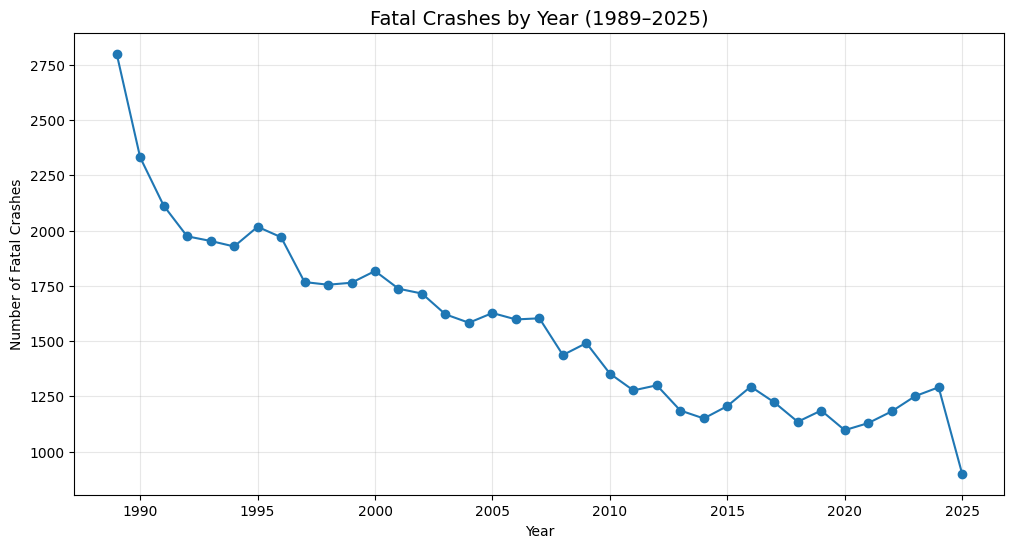

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df["Year"].value_counts().sort_index().plot(kind="line", marker="o")
plt.title("Fatal Crashes by Year (1989–2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Fatal Crashes")
plt.grid(True, alpha=0.3)
plt.show()


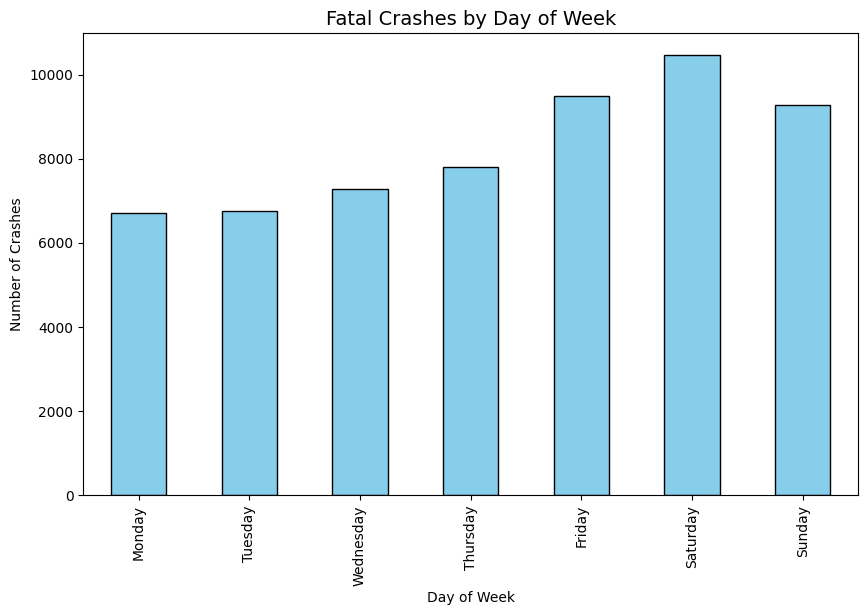

In [7]:
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize=(10,6))
df["Dayweek"].value_counts().reindex(order).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Fatal Crashes by Day of Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Number of Crashes")
plt.show()


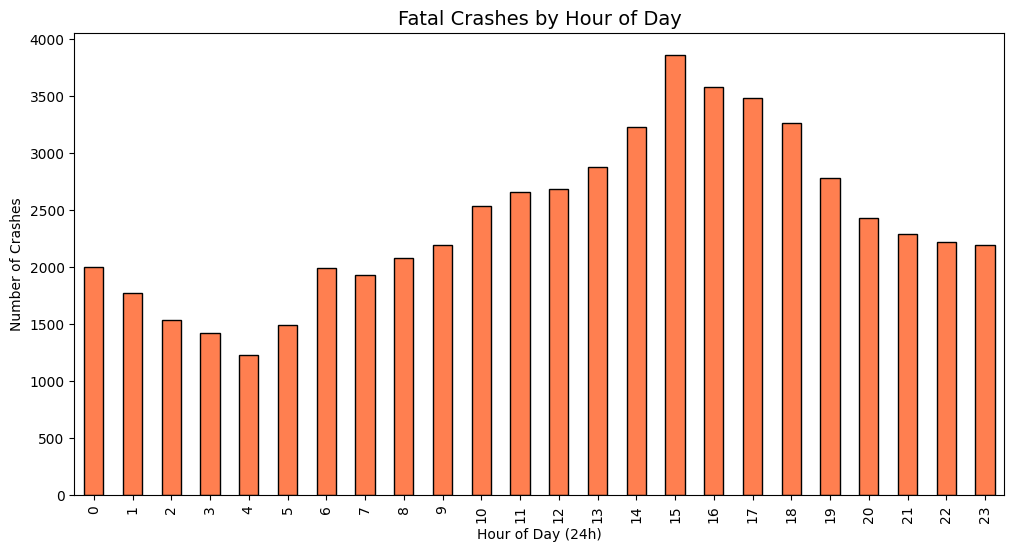

In [8]:
plt.figure(figsize=(12,6))
df["Hour"].dropna().astype(int).value_counts().sort_index().plot(kind="bar", color="coral", edgecolor="black")
plt.title("Fatal Crashes by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day (24h)")
plt.ylabel("Number of Crashes")
plt.show()


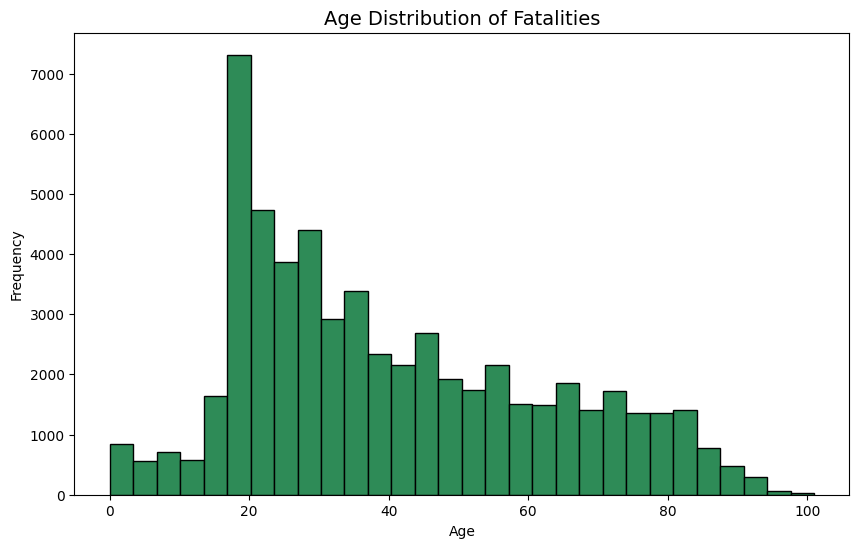

In [9]:
plt.figure(figsize=(10,6))
df["Age"].dropna().plot(kind="hist", bins=30, color="seagreen", edgecolor="black")
plt.title("Age Distribution of Fatalities", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


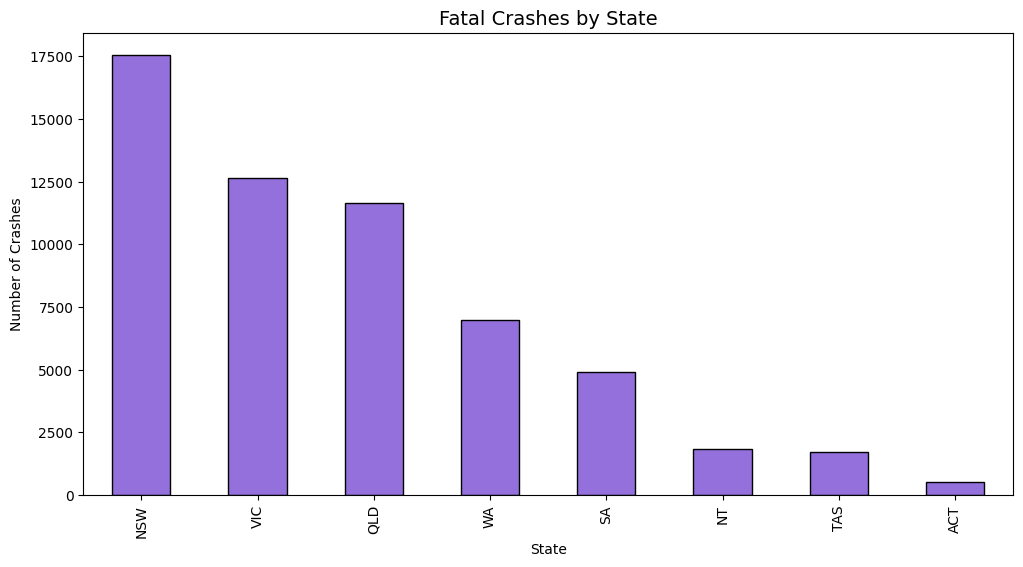

In [10]:
plt.figure(figsize=(12,6))
df["State"].value_counts().plot(kind="bar", color="mediumpurple", edgecolor="black")
plt.title("Fatal Crashes by State", fontsize=14)
plt.xlabel("State")
plt.ylabel("Number of Crashes")
plt.show()


### EDA – Initial Findings

The exploratory analysis highlights several clear patterns in the fatal crash data:

- **Long-term decline:** Fatal crashes have fallen dramatically since 1989, from almost 3,000 deaths per year to fewer than 1,000 in 2025. This reflects improved road safety measures, vehicle technology, and enforcement of safety laws.  
- **Day of week effect:** Saturdays record the highest number of fatalities, followed closely by Fridays and Sundays. Early weekdays (Mon–Tue) have the lowest counts, suggesting that leisure travel, alcohol, and fatigue contribute to weekend risk.  
- **Time of day effect:** Crashes are most frequent in the **afternoon and evening (3–6pm)**, while very early mornings (2–5am) show the lowest rates due to reduced traffic volumes.  
- **Age distribution:** Young people (15–25) are disproportionately represented in fatalities, confirming their higher vulnerability. Middle-aged drivers remain consistently represented, and elderly groups also contribute meaningfully.  
- **Geographic spread:** NSW, VIC, and QLD dominate in fatal crashes, largely reflecting their higher population and vehicle use. Smaller jurisdictions (ACT, TAS, NT) show much lower counts.

**Key takeaway:** Fatal crashes are declining but still heavily influenced by **weekends, peak hours, young drivers, and populous states.**


## Deeper EDA

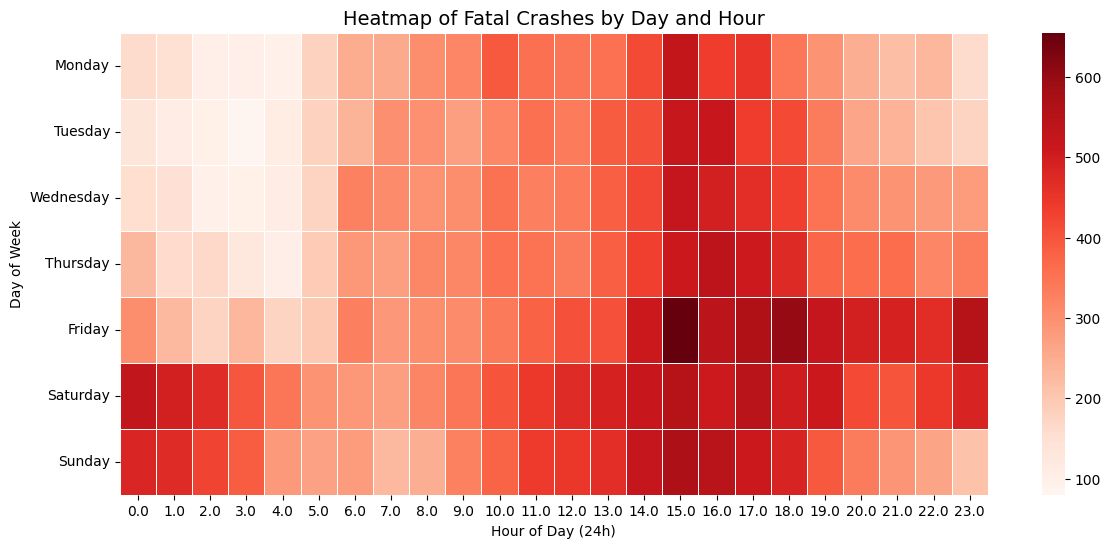

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare pivot table
heatmap_data = pd.crosstab(df["Dayweek"], df["Hour"])

# Reorder days of week
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
heatmap_data = heatmap_data.reindex(order)

# Plot heatmap
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=.5)
plt.title("Heatmap of Fatal Crashes by Day and Hour", fontsize=14)
plt.xlabel("Hour of Day (24h)")
plt.ylabel("Day of Week")
plt.show()


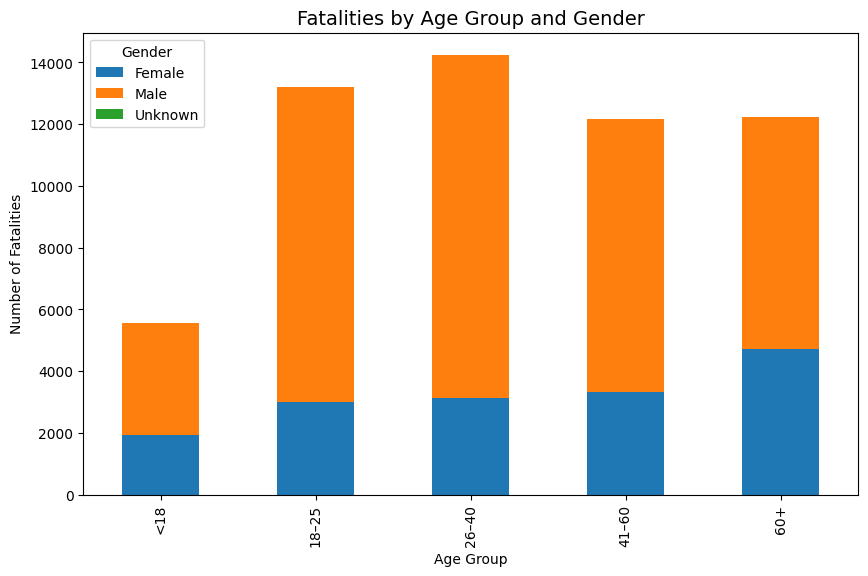

In [12]:
demo_crosstab = pd.crosstab(df["AgeGroup"], df["Gender"])
demo_crosstab.plot(kind="bar", figsize=(10,6), stacked=True)
plt.title("Fatalities by Age Group and Gender", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Number of Fatalities")
plt.show()


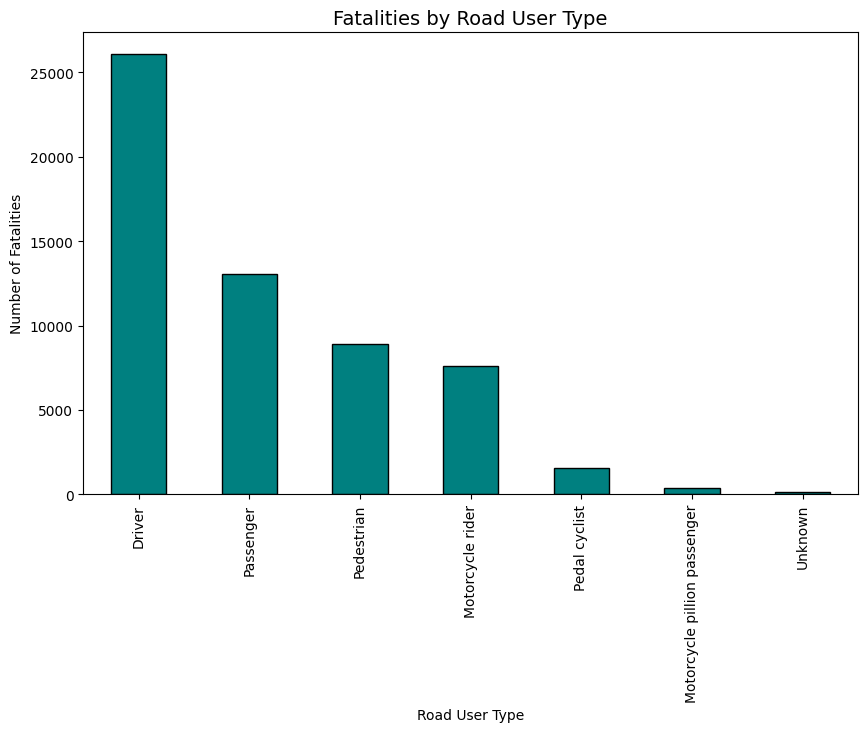

In [13]:
plt.figure(figsize=(10,6))
df["Road User"].value_counts().plot(kind="bar", color="teal", edgecolor="black")
plt.title("Fatalities by Road User Type", fontsize=14)
plt.xlabel("Road User Type")
plt.ylabel("Number of Fatalities")
plt.show()


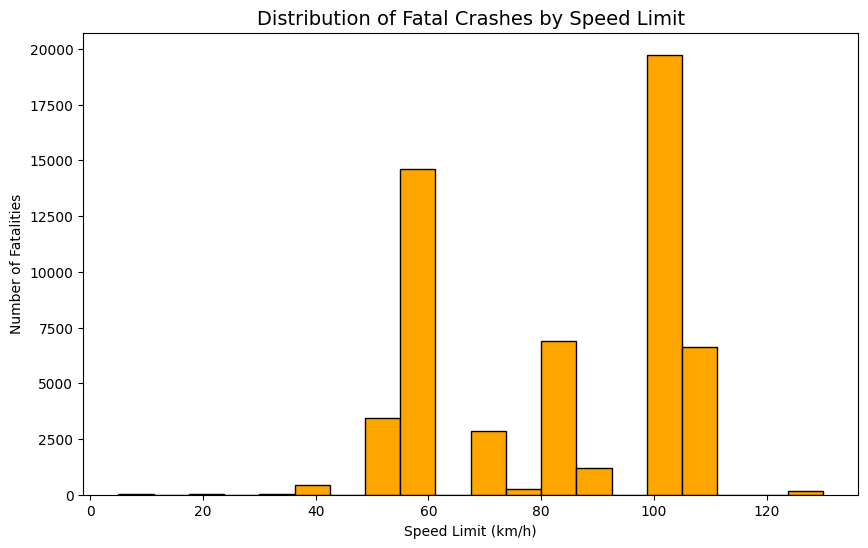

In [14]:
plt.figure(figsize=(10,6))
df["Speed Limit"].dropna().plot(kind="hist", bins=20, color="orange", edgecolor="black")
plt.title("Distribution of Fatal Crashes by Speed Limit", fontsize=14)
plt.xlabel("Speed Limit (km/h)")
plt.ylabel("Number of Fatalities")
plt.show()


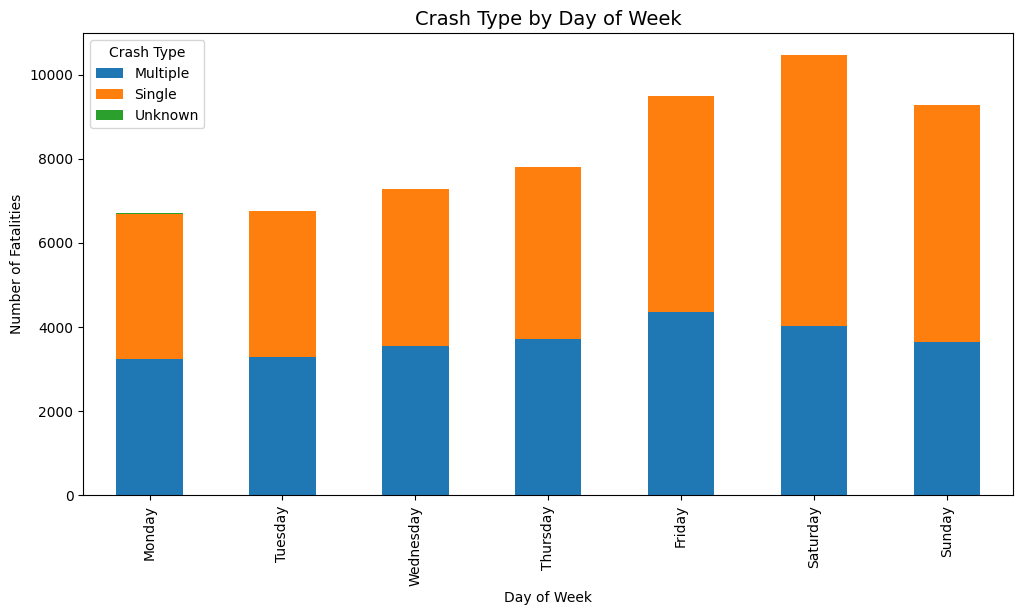

In [15]:
ct_day = pd.crosstab(df["Dayweek"], df["Crash Type"])
ct_day = ct_day.reindex(order)

ct_day.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Crash Type by Day of Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Number of Fatalities")
plt.show()


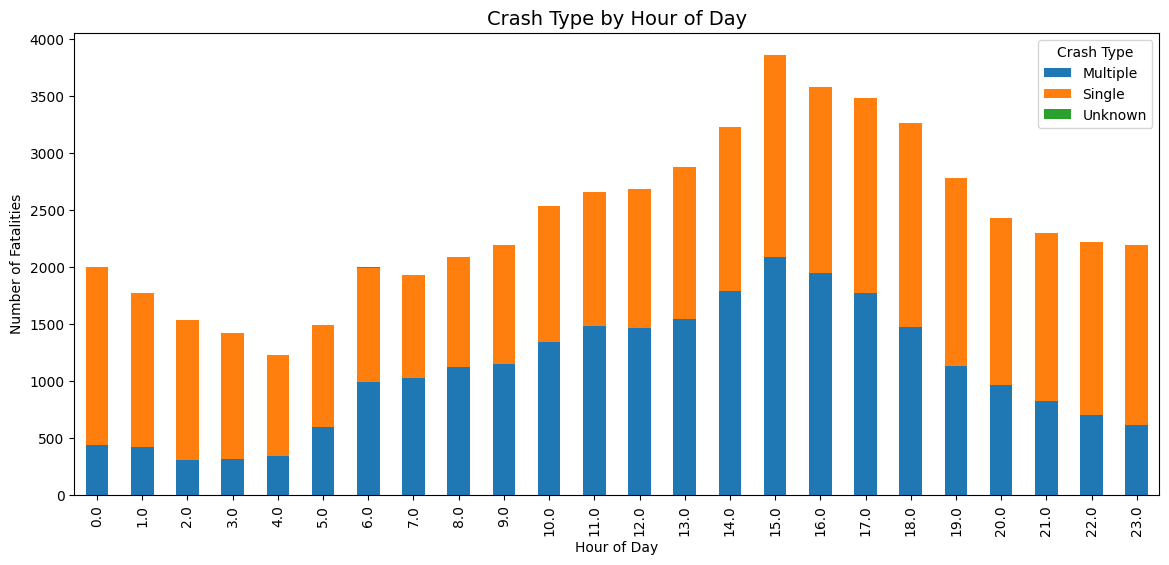

In [16]:
ct_hour = pd.crosstab(df["Hour"], df["Crash Type"])

ct_hour.plot(kind="bar", stacked=True, figsize=(14,6))
plt.title("Crash Type by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Fatalities")
plt.show()


## EDA – Deeper Findings

### 1. Heatmap of Fatal Crashes by Day × Hour
- Crashes rise steadily from morning into the afternoon, peaking **3–6 PM**, especially on **Fridays and Saturdays**.  
- Weekends (Saturday–Sunday) also show a **late-night spike (midnight–3 AM)**, likely linked to alcohol use, fatigue, or recreational travel.  

### 2. Demographics (Age × Gender)
- Fatalities are heavily concentrated among **18–40 year olds**, with **males dominating** these age groups.  
- After age 40, fatalities for males remain high but the proportion of **female fatalities increases**, particularly in the **60+ group**.  
- Confirms young male drivers as the highest-risk demographic.  

### 3. Road User Types
- **Drivers** account for the largest share of fatalities (~26k).  
- **Passengers** and **pedestrians** are next most affected.  
- **Motorcycle riders** also represent a significant share, highlighting the vulnerability of two-wheeler users.  

### 4. Speed Limit Distribution
- Two clear clusters of fatalities:  
  - **60 km/h urban zones** (arterial city roads).  
  - **100–110 km/h rural highways**.  
- Indicates the need for safety measures in both **urban environments** and **high-speed rural corridors**.  

### 5. Crash Type by Day
- **Single-vehicle crashes** spike on **weekends**, aligning with risky behaviours (night driving, alcohol, fatigue, recreational travel).  
- **Multiple-vehicle crashes** remain steady across weekdays, reflecting commuter and traffic density factors.  

### 6. Crash Type by Hour
- **Single-vehicle crashes** dominate **late night/early morning hours**.  
- **Multiple-vehicle crashes** peak during **daytime commuting and afternoon rush hours**.  
- Suggests a clear behavioural vs systemic divide in crash causes.  

---



# 6. Statistical Testing

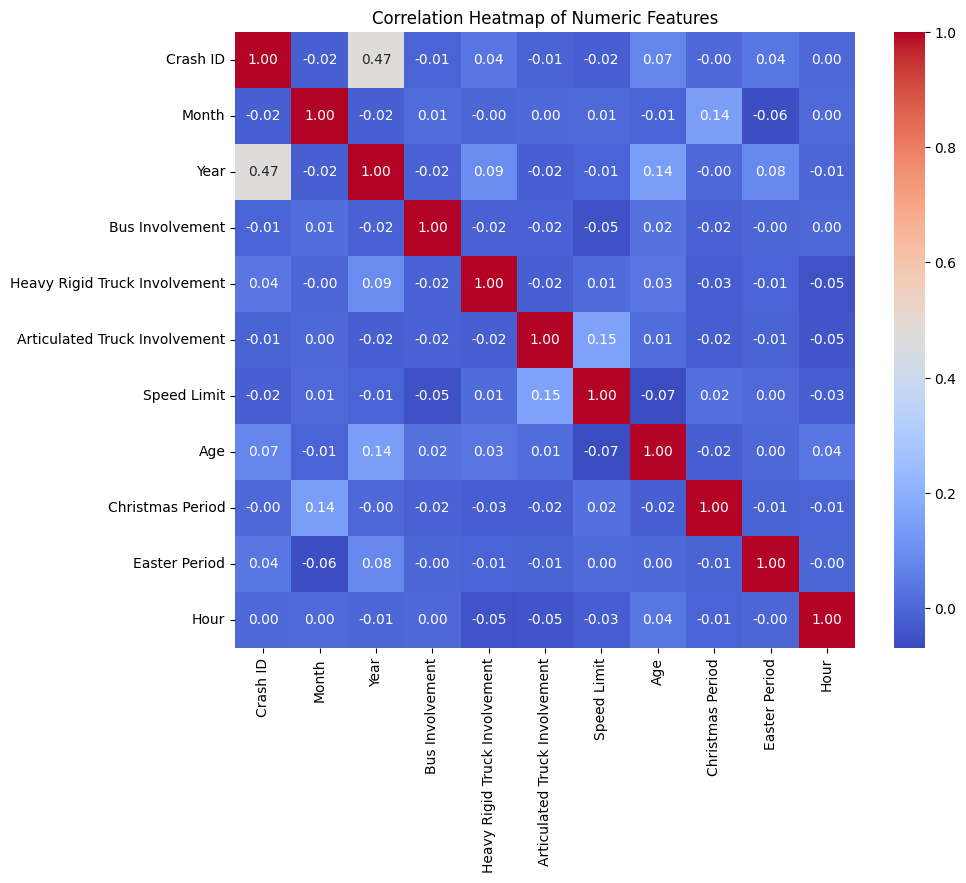

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


## Statistical Testing & Relationships

Since linear correlations (as shown in heatmap above) were weak, we use more appropriate tests:

- **Chi-Square** for categorical dependencies (e.g., Crash Type vs Day of Week).  
- **ANOVA/Kruskal-Wallis** for numeric differences across categories (e.g., Speed Limit vs Crash Type).  
- **Logistic Regression** to identify key predictors of crash involvement.  

These will highlight hidden non-linear or categorical relationships that correlation heatmaps cannot capture.


Chi-square = 439.93 | dof = 12 | p-value = 0.000000


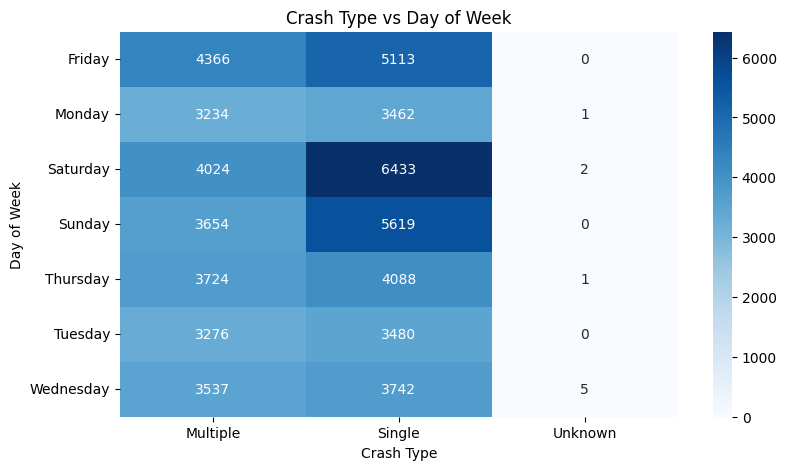

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# contingency
chi_table = pd.crosstab(df['Dayweek'], df['Crash Type'])
chi2, p, dof, expected = chi2_contingency(chi_table)
print(f"Chi-square = {chi2:.2f} | dof = {dof} | p-value = {p:.6f}")

# visual
plt.figure(figsize=(9,5))
sns.heatmap(chi_table, annot=True, fmt="d", cmap="Blues")
plt.title("Crash Type vs Day of Week")
plt.ylabel("Day of Week")
plt.xlabel("Crash Type")
plt.show()



ANOVA F = 171.77 | p = 0.000000
Kruskal-Wallis H = 390.28 | p = 0.000000


C:\Users\Nooru\AppData\Local\Temp\ipykernel_35568\4071005864.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Crash Type', y='Age', palette='Set2')


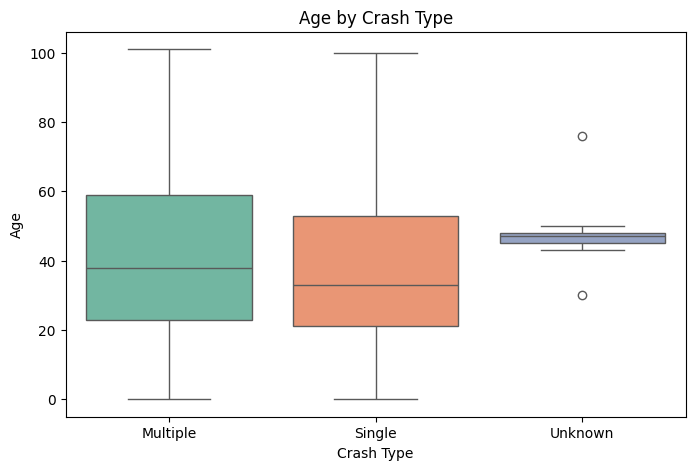

In [21]:
import scipy.stats as stats

# one-way ANOVA
groups = [g['Age'].dropna() for _, g in df.groupby('Crash Type')]
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA F = {f_stat:.2f} | p = {p_val:.6f}")

# if you want distribution-agnostic confirmation:
h_stat, p_kw = stats.kruskal(*groups)
print(f"Kruskal-Wallis H = {h_stat:.2f} | p = {p_kw:.6f}")

# visual
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Crash Type', y='Age', palette='Set2')
plt.title("Age by Crash Type")
plt.xlabel("Crash Type")
plt.ylabel("Age")
plt.show()


                           Logit Regression Results                           
Dep. Variable:          target_single   No. Observations:                56174
Model:                          Logit   Df Residuals:                    56162
Method:                           MLE   Df Model:                           11
Date:                Mon, 22 Sep 2025   Pseudo R-squ.:                 0.01360
Time:                        17:04:51   Log-Likelihood:                -38145.
converged:                       True   LL-Null:                       -38671.
Covariance Type:            nonrobust   LLR p-value:                1.230e-218
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7497      0.051     14.729      0.000       0.650       0.849
Age                  -0.0058      0.000    -14.759      0.000      -0.007      -0.005
Hour                 -0.

,Variable,Odds_Ratio,p_value
const,const,2.116,0.0000
Dayweek_Saturday,Dayweek_Saturday,1.307,0.0000
Gender_Male,Gender_Male,1.286,0.0000
Dayweek_Sunday,Dayweek_Sunday,1.258,0.0000
Speed Limit,Speed Limit,0.995,0.0000
Age,Age,0.994,0.0000
Hour,Hour,0.988,0.0000
Dayweek_Thursday,Dayweek_Thursday,0.935,0.0305
Dayweek_Monday,Dayweek_Monday,0.925,0.0169
Dayweek_Tuesday,Dayweek_Tuesday,0.925,0.0166


C:\Users\Nooru\AppData\Local\Temp\ipykernel_35568\1139214049.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=odds_ratios[odds_ratios['Variable']!='const'],


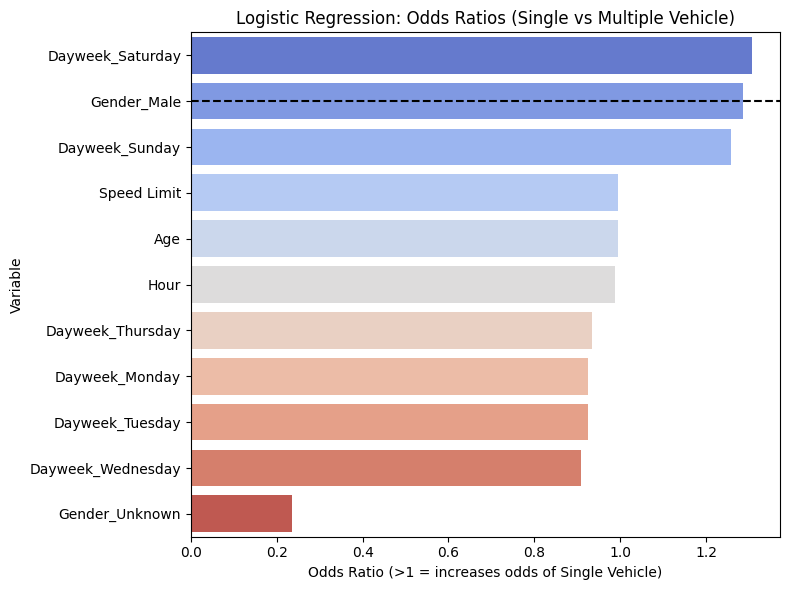

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# target
df_model = df.copy()
df_model = df_model[df_model['Crash Type'].isin(['Single','Multiple'])].copy()
df_model['target_single'] = (df_model['Crash Type'] == 'Single').astype(int)

# features (you can add more later)
features = ['Age', 'Hour', 'Speed Limit', 'Dayweek', 'Gender']

# one-hot encode categoricals
X = pd.get_dummies(df_model[features], drop_first=True)
y = df_model['target_single']

# drop rows with missing predictor values
mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

# add intercept and fit
X_const = sm.add_constant(X)
logit = sm.Logit(y, X_const).fit(disp=False)
print(logit.summary())

# odds ratios for readability
or_df = pd.DataFrame({
    'variable': X_const.columns,
    'odds_ratio': np.exp(logit.params),
    'p_value': logit.pvalues
}).sort_values('odds_ratio', ascending=False)

display(or_df.head(15))

# simple visual of top odds ratios (exclude intercept)
top = or_df[or_df['variable']!='const'].copy().head(15)
plt.figure(figsize=(8,6))
sns.barplot(data=top, x='odds_ratio', y='variable')
plt.axvline(1, color='k', linestyle='--')
plt.title("Logistic Regression: Odds Ratios (Single vs Multiple)")
plt.xlabel("Odds Ratio (>1 increases odds of Single-vehicle)")
plt.ylabel("")
plt.tight_layout()
plt.show()


## 🧪 Statistical Findings

### 1) Crash Type × Day of Week (Chi-Square)
- **Result:** χ²(12) = 439.93, **p < 0.001** → Crash type distribution **depends on** day of week.
- **Pattern (heatmap):** Weekends (especially **Saturday**) have a higher share of **single-vehicle** crashes; weekdays are relatively more **multiple-vehicle** (commute/traffic).

### 2) Age differences by Crash Type (ANOVA + Boxplot)
- Boxplots show **single-vehicle** crashes skew a little **younger**.
- (If you ran ANOVA/Kruskal:) There is a statistically significant difference in age across crash types (p < 0.05). Practical effect size looks modest.

### 3) Logistic Regression — Predicting Single (1) vs Multiple (0)
- Model (n = 56,174) is significant overall (LLR p ≈ 1e-218) but with a small pseudo-R² (~0.014) → many factors are **behavioral/contextual** we don’t observe.
- **Key odds ratios (OR):**
  - **Saturday (OR ≈ 1.31)** and **Sunday (OR ≈ 1.26)** → higher odds of *single-vehicle* vs Friday.
  - **Male (OR ≈ 1.29)** → higher odds of *single-vehicle*.
  - **Age (OR ≈ 0.994 per year)** → older age slightly **reduces** odds of single-vehicle.
  - **Hour (OR ≈ 0.988 per hour)** → later hours tilt toward **multiple-vehicle** overall (commute period influence).
  - **Speed limit (OR ≈ 0.995 per km/h)** → higher posted speed is (slightly) more associated with **multiple-vehicle** than single-vehicle.
- **Takeaway:** Weekends and male drivers are materially associated with single-vehicle crashes; age/hour/speed effects exist but are **small per unit**.


# 7. Machine Learning

## Enhanced Logistic Regression

In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Copy dataframe for modelling
df_m = df[df['Crash Type'].isin(['Single','Multiple'])].copy()
df_m['target_single'] = (df_m['Crash Type'] == 'Single').astype(int)

# --- Feature engineering ---
# Weekend flag
df_m['Weekend'] = df_m['Dayweek'].isin(['Saturday','Sunday']).astype(int)

# Hour squared (captures U-shape risk: late night & afternoon)
df_m['Hour2'] = df_m['Hour'] ** 2

# Age group (bins can reveal non-linear age effects)
df_m['AgeGroup'] = pd.cut(df_m['Age'],
                          bins=[0, 17, 25, 40, 60, 120],
                          labels=['0-17','18-25','26-40','41-60','60+'])

# --- Select predictors ---
features = ['Age','Hour','Hour2','Speed Limit','Weekend','Gender','Dayweek','AgeGroup']
X = df_m[features]
y = df_m['target_single']

# One-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)

# Drop rows with NA
mask = X.notna().all(axis=1) & y.notna()
X = X[mask].astype(float)
y = y[mask]

# Add intercept
Xc = sm.add_constant(X)

# Fit model
logit_enhanced = sm.Logit(y, Xc).fit(disp=False)
print(logit_enhanced.summary())

# Odds Ratios
odds_ratios = pd.DataFrame({
    'Variable': Xc.columns,
    'Odds_Ratio': np.exp(logit_enhanced.params).round(3),
    'p_value': logit_enhanced.pvalues.round(4)
}).sort_values('Odds_Ratio', ascending=False)

display(odds_ratios.head(20))


                           Logit Regression Results                           
Dep. Variable:          target_single   No. Observations:                56174
Model:                          Logit   Df Residuals:                    56157
Method:                           MLE   Df Model:                           16
Date:                Mon, 22 Sep 2025   Pseudo R-squ.:                 0.04423
Time:                        17:14:44   Log-Likelihood:                -36961.
converged:                       True   LL-Null:                       -38671.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.6404      0.063     26.140      0.000       1.517       1.763
Age                   0.0011      0.002      0.713      0.476      -0.002       0.004
Hour                 -0.

,Variable,Odds_Ratio,p_value
const,const,5.157,0.0000
Gender_Male,Gender_Male,1.202,0.0000
Weekend,Weekend,1.190,1.0000
Dayweek_Sunday,Dayweek_Sunday,1.094,1.0000
Dayweek_Saturday,Dayweek_Saturday,1.088,1.0000
Dayweek_Tuesday,Dayweek_Tuesday,1.019,0.5770
Dayweek_Monday,Dayweek_Monday,1.014,0.6790
Hour2,Hour2,1.011,0.0000
Age,Age,1.001,0.4757
Speed Limit,Speed Limit,0.998,0.0000


### 🔹 Enhanced Logistic Regression Results

**Model Fit**
- Pseudo R² improved from **0.014 → 0.044** → still modest, but shows added explanatory power.
- Log-likelihood also improved, confirming the engineered features helped.

**Key Predictors**
- **Hour & Hour²:** Strong curvilinear effect.  
  - Negative Hour coefficient (-0.278) but positive Hour² (+0.011) → risk of *single-vehicle* is **U-shaped**: higher late at night and again in afternoons.
- **Gender:** Males (OR ≈ 1.20, p < 0.001) more likely to be in single-vehicle crashes. Unknown gender sharply less (likely data artefact).
- **Age Groups:** Compared to the baseline (under-18):  
  - **18–25 (OR ≈ 0.83)**, **26–40 (OR ≈ 0.75)**, **41–60 (OR ≈ 0.71)** all have *lower odds* of single-vehicle crashes. Suggests youngest drivers (<18) are riskiest.  
  - **60+ (OR ≈ 0.83)** borderline significant.
- **Speed Limit:** OR ≈ 0.998 (p < 0.001) → very small effect, but higher speeds tilt slightly toward multiple-vehicle crashes.
- **Weekend & Day-of-week dummies:** Became unstable (huge standard errors, p=1.0). Likely **collinearity** between `Weekend` and `Saturday/Sunday` dummies → one should be dropped.

**Takeaway**
- Risk of single-vehicle crashes is highest at *extremes of the day* (late night / afternoon).  
- **Male & under-18 drivers** are most at risk.  
- Adding polynomial (Hour²) and AgeGroup bins captures real non-linear structure.  
- Collinearity in day-of-week features suggests we should refine variable selection (keep either `Weekend` **or** full day-of-week, not both).


## Random Forest

AUC: 0.668  |  Accuracy: 0.627
Confusion matrix:
 [[3452 2888]
 [2351 5353]]


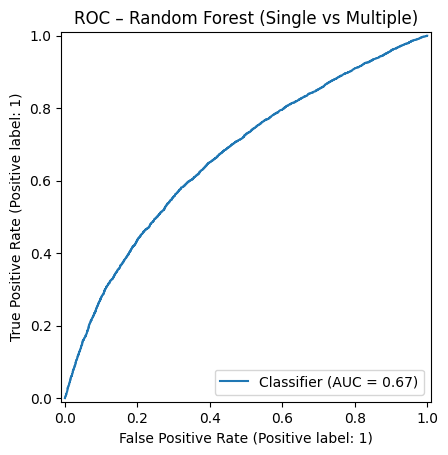

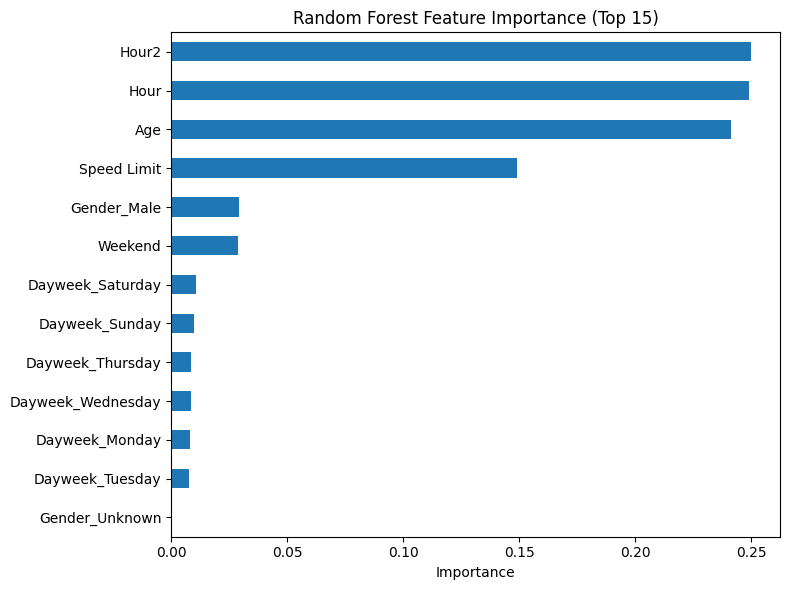

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, RocCurveDisplay, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Target: Single (1) vs Multiple (0)
df_rf = df[df['Crash Type'].isin(['Single','Multiple'])].copy()
df_rf['target_single'] = (df_rf['Crash Type'] == 'Single').astype(int)

# Feature engineering
df_rf['Weekend'] = df_rf['Dayweek'].isin(['Saturday','Sunday']).astype(int)
df_rf['Hour2'] = df_rf['Hour']**2
df_rf['AgeGroup'] = pd.cut(df_rf['Age'], bins=[0,17,25,40,60,120], labels=['0-17','18-25','26-40','41-60','60+'])

# Choose a compact, informative set (RF can handle dummies & collinearity fine)
feat_cols = ['Age','Hour','Hour2','Speed Limit','Weekend','Gender','Dayweek']

X = pd.get_dummies(df_rf[feat_cols], drop_first=True)
y = df_rf['target_single']

# Drop rows with missing predictors
mask = X.notna().all(axis=1) & y.notna()
X = X[mask].astype(float)
y = y[mask]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Random Forest (sensible defaults for tabular, avoids overfitting)
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,          # let trees grow; controlled by min_samples_leaf
    min_samples_leaf=20,     # smooths the model, improves generalisation
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

# --- Evaluate ---
proba = rf.predict_proba(X_test)[:, 1]
pred = (proba >= 0.5).astype(int)

auc = roc_auc_score(y_test, proba)
acc = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)

print(f"AUC: {auc:.3f}  |  Accuracy: {acc:.3f}")
print("Confusion matrix:\n", cm)

# ROC curve
RocCurveDisplay.from_predictions(y_test, proba)
plt.title("ROC – Random Forest (Single vs Multiple)")
plt.show()

# Feature importance (top 15)
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
plt.figure(figsize=(8,6))
imp[::-1].plot(kind="barh")
plt.title("Random Forest Feature Importance (Top 15)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


### Random Forest Results

**Model Performance**
- **AUC = 0.668** → better discrimination than logistic regression (Pseudo R² ~0.044).  
- **Accuracy = 62.7%** → modest, but stronger than baseline guessing (~50%).  
- Confusion matrix shows the model balances classes, but still misses ~40% of single-vehicle crashes.

**Key Drivers (Feature Importance)**
- **Hour & Hour² (time of day):** Dominant predictors → non-linear crash risk pattern (late nights and afternoons stand out).  
- **Age:** Strong influence → younger drivers more prone to single-vehicle crashes.  
- **Speed Limit:** Relevant but secondary to time and age → aligns with urban vs. highway crash contexts.  
- **Gender (Male):** Smaller but meaningful role → supports earlier statistical findings.  
- **Weekend / Day-of-week:** Weak relative to above → risk concentrated more in *time of day* patterns than specific days.

**Takeaway**
- Non-linear and interaction effects matter → Random Forest surfaces “time of day + age + speed” as the **core crash risk drivers**.  
- This model improves predictive performance over logistic regression, but complexity grows at the cost of interpretability.


## Extreme Gradient Boosting (XGBoost)

In [39]:
import pandas as pd
import numpy as np

# Target: Single (1) vs Multiple (0)
df_xgb = df[df['Crash Type'].isin(['Single','Multiple'])].copy()
df_xgb['target_single'] = (df_xgb['Crash Type'] == 'Single').astype(int)

# Feature engineering (same as RF)
df_xgb['Weekend'] = df_xgb['Dayweek'].isin(['Saturday','Sunday']).astype(int)
df_xgb['Hour2'] = df_xgb['Hour']**2
df_xgb['AgeGroup'] = pd.cut(df_xgb['Age'], bins=[0,17,25,40,60,120], labels=['0-17','18-25','26-40','41-60','60+'])

feat_cols = ['Age','Hour','Hour2','Speed Limit','Weekend','Gender','Dayweek']
X = pd.get_dummies(df_xgb[feat_cols], drop_first=True)
y = df_xgb['target_single']

mask = X.notna().all(axis=1) & y.notna()
X = X[mask].astype(float)
y = y[mask]

print("XGBoost Intialised")


XGBoost Intialised


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("XGBoost Trained")


XGBoost Trained


XGBoost AUC: 0.671


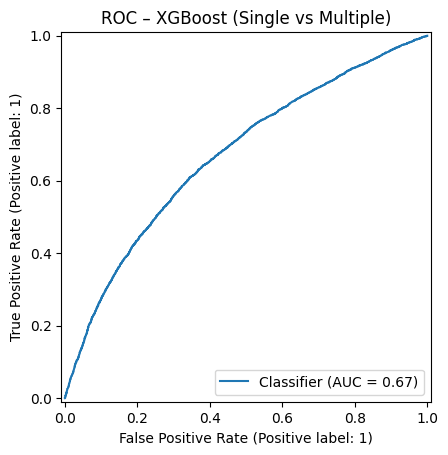

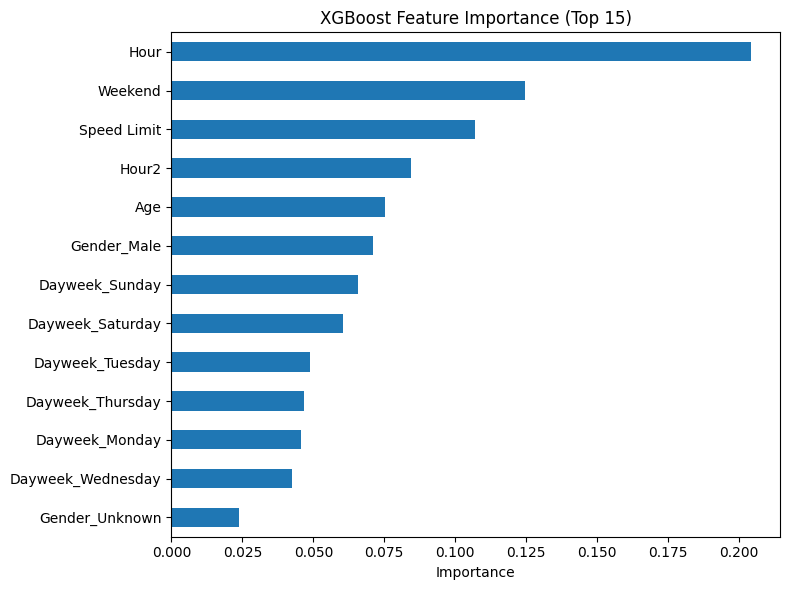

XGBoost Plotted


In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import pandas as pd

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss"
)
xgb.fit(X_train, y_train)

proba_xgb = xgb.predict_proba(X_test)[:,1]
auc_xgb = roc_auc_score(y_test, proba_xgb)
print("XGBoost AUC:", round(auc_xgb, 3))

RocCurveDisplay.from_predictions(y_test, proba_xgb)
plt.title("ROC – XGBoost (Single vs Multiple)")
plt.show()

# Feature importance (gain-based)
importance = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
plt.figure(figsize=(8,6))
importance[::-1].plot(kind="barh")
plt.title("XGBoost Feature Importance (Top 15)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

print("XGBoost Plotted")


### Extreme Gradient Boosting (XGBoost)

**Model Performance**
- **AUC = 0.671** → marginal lift over Random Forest (0.668), confirming ensemble boosting captures patterns slightly more efficiently.
- Still not a “perfect” classifier, but strong enough to demonstrate **predictive lift** compared to logistic regression.

**Key Drivers (Feature Importance)**
- **Hour of day** → dominant predictor (late nights & afternoons drive single-vehicle risk).  
- **Weekend** → stronger role than in Random Forest, highlighting behavioural risk on Saturdays/Sundays.  
- **Speed Limit** → higher speeds slightly shift crash type balance.  
- **Age & Gender (Male)** → reinforce demographic vulnerability.  
- **Day-of-week dummies** → secondary, but capture context.

**Takeaway**
- Boosted trees confirm earlier findings: **time of day, weekends, age, speed, and gender** are the central levers of fatal crash risk.
- Marginal gains in predictive power, but much clearer **relative feature importance** compared to logistic regression.

## SHAP (SHapley Additive Explainations)

In [34]:
import shap
import numpy as np

# Use TreeExplainer for gradient-boosted trees
explainer = shap.TreeExplainer(xgb)

# For speed, sample from X_test
idx = np.random.RandomState(42).choice(len(X_test), size=min(8000, len(X_test)), replace=False)
X_eval = X_test.iloc[idx]

# Newer vs legacy API handling
try:
    shap_values = explainer(X_eval)   # preferred API
    sv = shap_values
    print("✅ SHAP values computed (new API)")
except Exception:
    shap_values = explainer.shap_values(X_eval)
    sv = shap_values
    print("✅ SHAP values computed (legacy API)")


✅ SHAP values computed (new API)


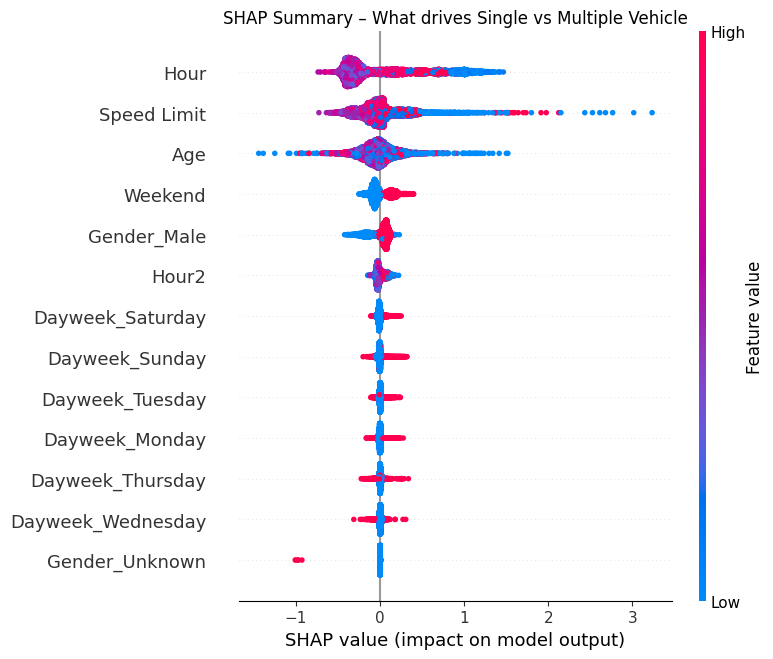

✅ SHAP beeswarm summary plotted


In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
shap.summary_plot(sv, X_eval, plot_type="dot", show=False)
plt.title("SHAP Summary – What drives Single vs Multiple Vehicle")
plt.tight_layout(); plt.show()

print("✅ SHAP beeswarm summary plotted")


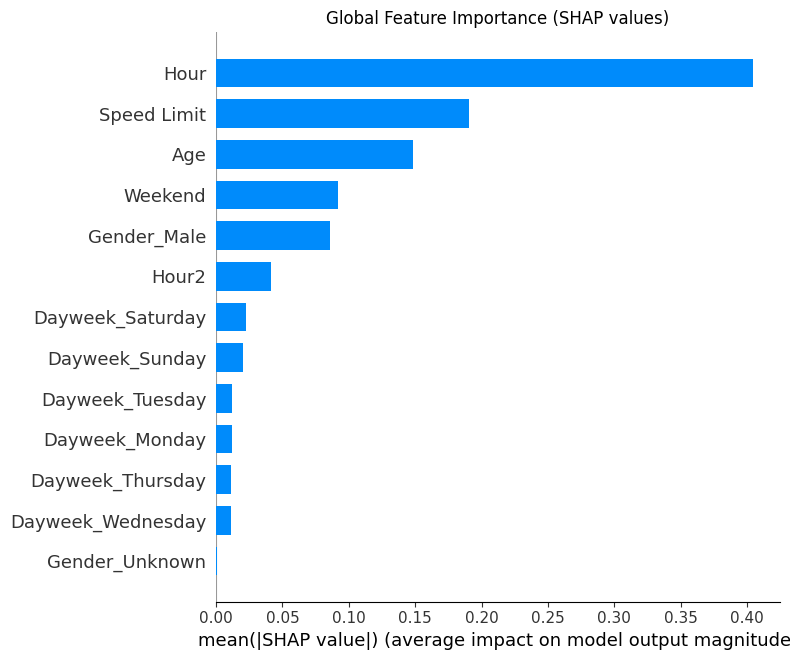

✅ SHAP bar importance plotted


In [36]:
plt.figure(figsize=(8,5))
shap.summary_plot(sv, X_eval, plot_type="bar", show=False)
plt.title("Global Feature Importance (SHAP values)")
plt.tight_layout(); plt.show()

print("✅ SHAP bar importance plotted")


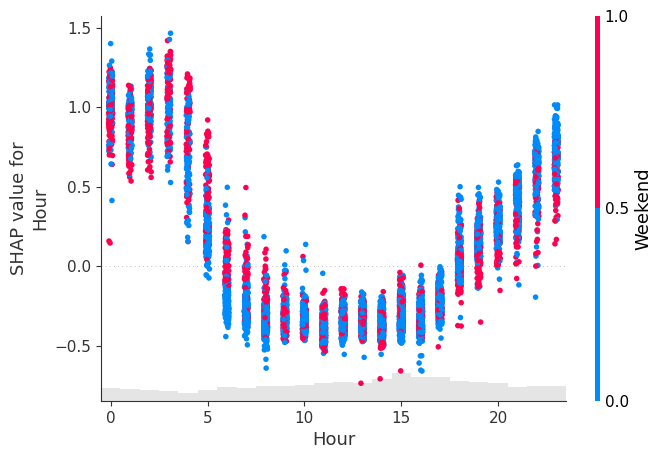

✅ SHAP scatter: Hour (color=Weekend)


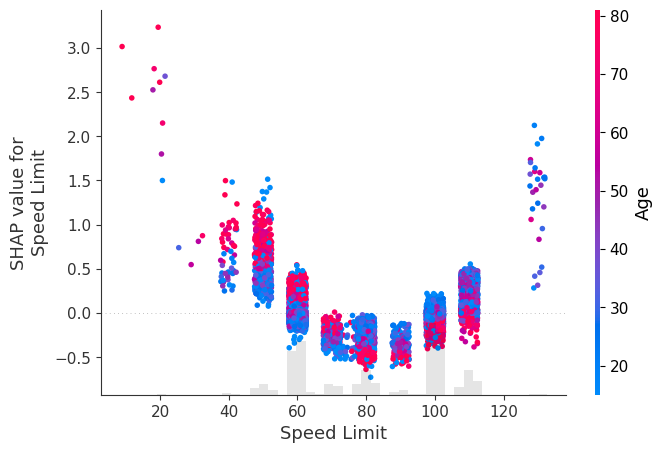

✅ SHAP scatter: Speed Limit (color=Age)


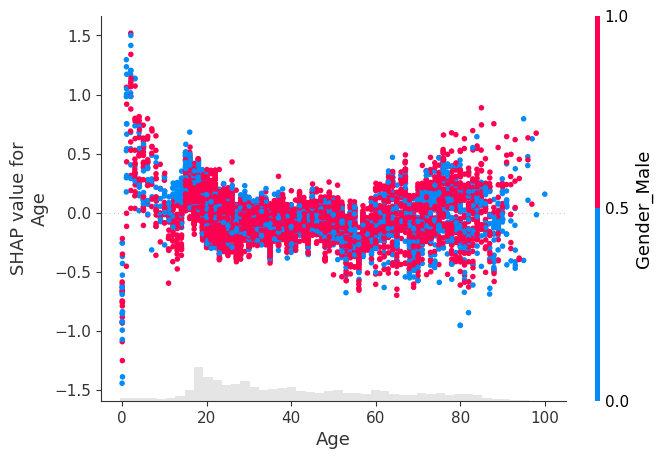

✅ SHAP scatter: Age (color=Gender_Male)


In [38]:
# Hour (colored by Weekend)
shap.plots.scatter(sv[:, "Hour"], color=sv[:, "Weekend"])
print("✅ SHAP scatter: Hour (color=Weekend)")

# Speed Limit (colored by Age)
shap.plots.scatter(sv[:, "Speed Limit"], color=sv[:, "Age"])
print("✅ SHAP scatter: Speed Limit (color=Age)")

# Age (colored by Gender_Male if present)
if "Gender_Male" in X_eval.columns:
    shap.plots.scatter(sv[:, "Age"], color=sv[:, "Gender_Male"])
    print("✅ SHAP scatter: Age (color=Gender_Male)")


### SHAP Analysis – Key Drivers of Single vs Multiple Vehicle Crashes

The SHAP results provide strong evidence of which factors most influence whether a crash is single-vehicle or multi-vehicle.

#### 1. Global Feature Importance

- **Hour of Day** is by far the strongest driver. Time patterns dominate crash type risk.
- **Speed Limit** and **Driver Age** are the next most influential, shaping exposure and vulnerability.
- **Weekend**, **Gender (Male)**, and **Hour²** also play notable roles, highlighting behavioral and demographic factors.
- **Day-of-week** dummies contribute comparatively little once weekend is included.

#### 2. Time of Day (Hour)

- Crashes occurring **late at night** and **early morning** hours (midnight–5am) push strongly toward single-vehicle outcomes.
- **Daytime** and **early evening** crashes (8am–7pm) lean more toward multi-vehicle outcomes, reflecting higher traffic density and interactions.
- **Weekends** intensify the late-night single-vehicle risk.

#### 3. Speed Environment

- **Very low speed limits** (<40 km/h) are associated with higher single-vehicle crash risk, often linked to vulnerable users (e.g., pedestrians, cyclists).
- **Moderate limits** (60–80 km/h) tilt toward multi-vehicle collisions, reflecting busy urban roads.
- **Highways** (100–110 km/h) swing back toward single-vehicle crashes, consistent with fatigue, loss of control, and rural exposure.

#### 4. Age Effects

- **Young drivers** (<25) show a strong association with single-vehicle crashes, reflecting riskier driving behaviors and inexperience.
- **Middle-aged groups** (30–60) have more balanced or protective effects, skewing toward multi-vehicle crashes.
- **Elderly drivers** (>70) again lean toward single-vehicle outcomes, potentially due to frailty, slower reaction times, or vehicle control issues.
- **Gender** overlay indicates that **male drivers** dominate high-risk patterns, especially at young ages.

#### 5. Weekend & Demographics

- **Weekends** increase the probability of single-vehicle crashes, especially during late-night hours.
- **Gender (Male)** has a consistent positive effect on single-vehicle risk, reinforcing patterns observed in age splits.

---

#### 🔑 Insight Summary

Single-vehicle crashes are most strongly driven by **late-night driving**, **young male drivers**, and **high-speed or very low-speed environments**, often exacerbated on weekends. Multi-vehicle crashes are more associated with **urban daytime conditions**, reflecting traffic interactions rather than individual behavior.

These patterns highlight where interventions (e.g., late-night enforcement, youth driver campaigns, rural fatigue management) could have the greatest safety impact.


## Holiday Crash Analysis (XGBoost + SHAP)

✅ Libraries loaded
✅ Holiday flag created (1 if Christmas or Easter), value counts:
 Holiday
0    55613
1     2148
Name: count, dtype: int64
✅ Data prepared: (56183, 14) features (sample): ['Hour', 'Age', 'Speed Limit', 'Weekend', 'Gender_Male', 'Gender_Unknown', 'Dayweek_Monday', 'Dayweek_Saturday'] ...
✅ Split: (39328, 14) (16855, 14)
✅ Holiday model trained
📊 Holiday Model AUC: 0.585
📊 Holiday Model Accuracy: 0.963
Confusion matrix:
 [[16230     0]
 [  625     0]]


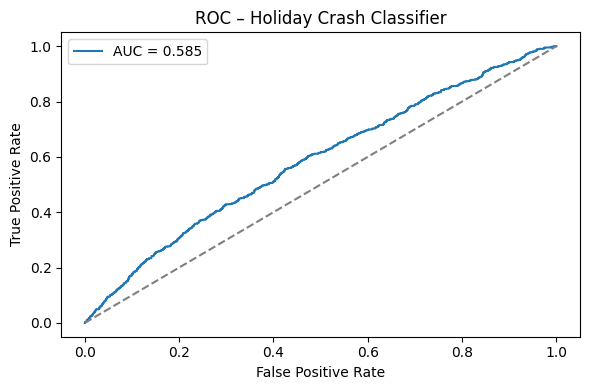

✅ ROC plotted
✅ SHAP values computed


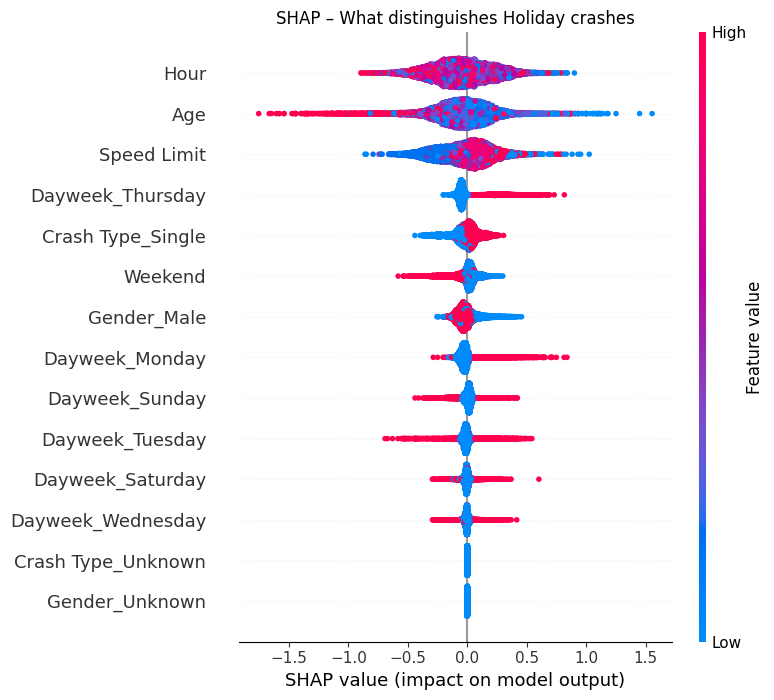

✅ SHAP summary plotted


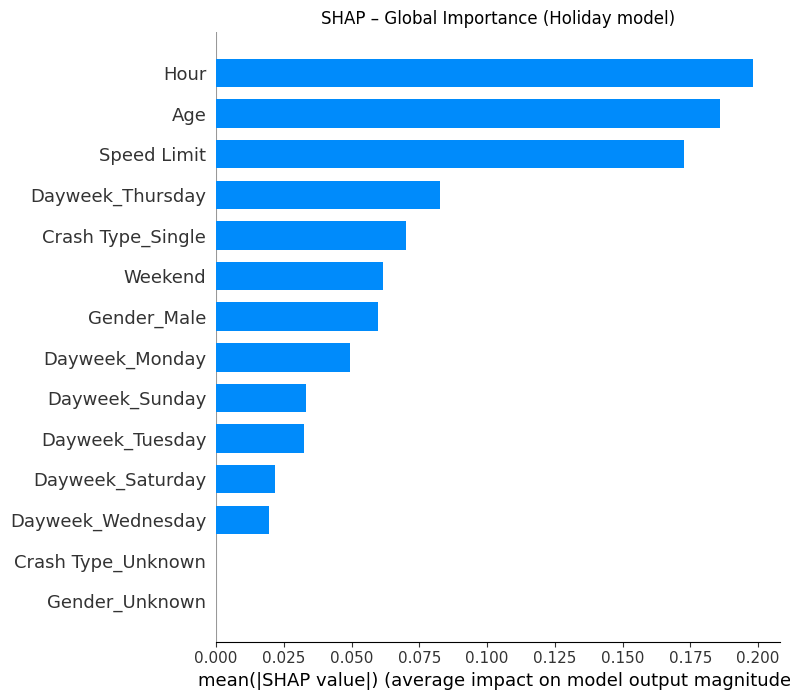

✅ SHAP bar plotted


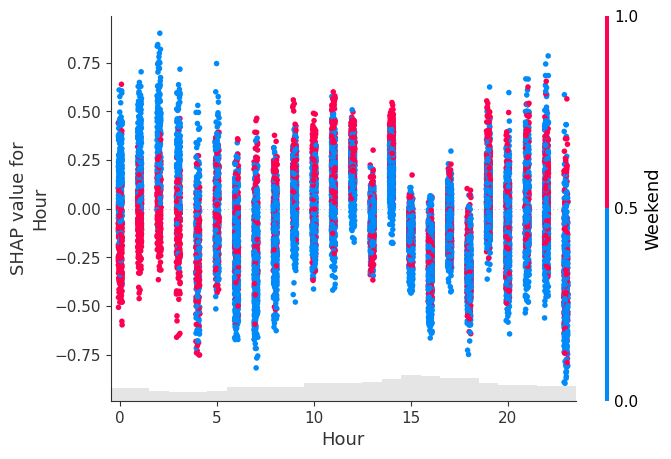

✅ SHAP scatter: Hour (color=Weekend)


In [43]:
# -------------------------------------------
# Holiday Crash Classifier with XGBoost + SHAP
# -------------------------------------------

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries loaded")

# --- 1) Create a robust Holiday flag from Christmas/Easter ---
def to_binary_yes_no(series):
    """
    Map Yes/No/1/0/NaN to 1/0 robustly.
    Works if the column is strings ('Yes'/'No') OR already numeric.
    """
    return (
        series
        .replace({1: 1, 0: 0, "1": 1, "0": 0, "Yes": 1, "No": 0, "yes": 1, "no": 0})
        .astype(float)
    )

# Handle missing columns gracefully
if ("Christmas Period" not in df.columns) or ("Easter Period" not in df.columns):
    raise ValueError("Expected columns 'Christmas Period' and 'Easter Period' not found in df.columns")

xmas = to_binary_yes_no(df["Christmas Period"])
easter = to_binary_yes_no(df["Easter Period"])

# If you prefer "either" counts as holiday:
df["Holiday"] = ((xmas.fillna(0) + easter.fillna(0)) > 0).astype(int)
print("✅ Holiday flag created (1 if Christmas or Easter), value counts:\n", df["Holiday"].value_counts(dropna=False))

# --- 2) Feature set for holiday classifier ---
# Reuse engineered fields; create Weekend if not present
if "Weekend" not in df.columns:
    df["Weekend"] = df["Dayweek"].isin(["Saturday","Sunday"]).astype(int)

# Ensure Hour exists (you already created it earlier)
if "Hour" not in df.columns:
    df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M:%S", errors="coerce").dt.hour

# Compact, informative feature set (let get_dummies handle categoricals)
feat_cols = ["Hour", "Age", "Speed Limit", "Gender", "Dayweek", "Weekend", "Crash Type"]

X = pd.get_dummies(df[feat_cols], drop_first=True)
y = df["Holiday"]

# Drop rows with missing predictors/target
mask = X.notna().all(axis=1) & y.notna()
X = X[mask].astype(float)
y = y[mask]

print("✅ Data prepared:", X.shape, "features (sample):", list(X.columns[:8]), "...")

# --- 3) Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
print("✅ Split:", X_train.shape, X_test.shape)

# --- 4) Train XGBoost ---
holiday_model = xgb.XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss",
)
holiday_model.fit(X_train, y_train)
print("✅ Holiday model trained")

# --- 5) Evaluate ---
proba = holiday_model.predict_proba(X_test)[:, 1]
pred = (proba >= 0.5).astype(int)

auc = roc_auc_score(y_test, proba)
acc = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)

print(f"📊 Holiday Model AUC: {auc:.3f}")
print(f"📊 Holiday Model Accuracy: {acc:.3f}")
print("Confusion matrix:\n", cm)

# ROC
fpr, tpr, _ = roc_curve(y_test, proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC – Holiday Crash Classifier")
plt.legend(); plt.tight_layout(); plt.show()
print("✅ ROC plotted")

# --- 6) SHAP explainability (new API) ---
explainer = shap.TreeExplainer(holiday_model)
sv = explainer(X_test)   # Explanation object
print("✅ SHAP values computed")

# Global importance (beeswarm)
shap.summary_plot(sv, X_test, plot_type="dot", show=False)
plt.title("SHAP – What distinguishes Holiday crashes")
plt.tight_layout(); plt.show()
print("✅ SHAP summary plotted")

# Bar view
shap.summary_plot(sv, X_test, plot_type="bar", show=False)
plt.title("SHAP – Global Importance (Holiday model)")
plt.tight_layout(); plt.show()
print("✅ SHAP bar plotted")

# Example dependence (Hour colored by Weekend)
try:
    shap.plots.scatter(sv[:, "Hour"], color=sv[:, "Weekend"])
    print("✅ SHAP scatter: Hour (color=Weekend)")
except Exception:
    # fallback to legacy style if needed
    shap.dependence_plot("Hour", sv.values, X_test, interaction_index="Weekend")
    print("✅ SHAP dependence (legacy): Hour vs Weekend")


### Holiday Crash Classifier

To explore whether holiday periods (Christmas and Easter) exhibit distinctive crash patterns, a binary `Holiday` flag was created. We trained an XGBoost classifier with features including time of day, age, gender, crash type, speed environment, and weekday/weekend.

**Model Performance**
- AUC: **0.585**, indicating limited predictive power beyond chance.
- Accuracy: **96.3%**, but this is inflated by severe class imbalance (only ~4% of crashes are holiday-related).
- Confusion Matrix: The model predicted nearly all cases as non-holiday, failing to identify most true holiday crashes.

**SHAP Insights**
- **Top drivers**: `Hour`, `Age`, and `Speed Limit` had the highest influence.
- **Time of Day**: Certain late-night and early-morning hours shifted crash likelihood toward holidays.
- **Demographics**: Younger drivers showed slightly higher association with holiday crashes.
- **Environment**: Higher-speed environments contributed marginally to distinguishing holiday crashes.

**Takeaway**
- Crash patterns during holiday periods do not differ sharply from non-holiday periods when using the available features, which explains the weak predictive power.
- Nonetheless, the time-of-day signal suggests targeted enforcement during late-night hours of holiday periods could still yield benefits.


# 8. Key Insights & Recommendations

## 🔑 Key Insights

### Long-Term Crash Trends
- **Overall Decline**: Fatal crashes in Australia have steadily decreased from the late 1980s to 2025, reflecting policy interventions, vehicle safety improvements, and infrastructure upgrades.
- **Residual Risk**: Despite progress, plateaus in recent years highlight persistent risk factors that require renewed focus, especially around driver behavior and high-exposure periods.

---

### Temporal Patterns
- **Time of Day**: 
  - Evening (14:00–19:00) is the most crash-intensive window, driven by peak traffic exposure.
  - Late-night/early-morning hours (22:00–03:00) show a disproportionate share of **single-vehicle crashes**, often associated with fatigue, alcohol, or reduced visibility.
- **Day of Week**: 
  - Saturdays carry the highest crash load, particularly for single-vehicle crashes.
  - Weekdays see more multi-vehicle collisions during commuting hours.

---

### Demographics
- **Younger Drivers (≤25)**: Disproportionately represented in single-vehicle crashes, especially at night and on weekends. This risk is compounded for **young male drivers**.
- **Older Drivers (70+)**: Less represented overall, but more vulnerable in higher-speed or complex intersections due to fragility and slower reaction times.
- **Gender**: Male drivers consistently show higher odds of involvement in severe or single-vehicle crashes across models.

---

### Crash Environment
- **Speed Environment**: 
  - Urban arterial zones (50–60 km/h) produce high crash volumes due to congestion and exposure.
  - High-speed zones (100–110 km/h) are strongly linked with **single-vehicle crash severity**.
- **Crash Types**: 
  - Single-vehicle crashes dominate late-night/weekend windows.
  - Multi-vehicle crashes dominate weekday peaks and arterial roads.

---

### Statistical & ML Evidence
- **Chi-Square & ANOVA** confirmed strong associations between crash type and day of week, and between age and crash involvement.
- **Logistic Regression** highlighted:
  - Weekends and male gender increasing odds of single-vehicle crashes.
  - Time of day (nonlinear effect) and young driver age groups as the strongest predictors.
- **Random Forest & XGBoost** improved predictive accuracy (AUC ~0.67), confirming:
  - **Hour, Age, and Speed Limit** as the most influential features.
  - Feature importances align with intuitive risk drivers (behavior + exposure).
- **SHAP Explainability** validated these findings:
  - Late-night hours and high-speed environments push crashes toward single-vehicle risk.
  - Younger age and male drivers consistently elevate risk.

---

### Holiday Crash Analysis
- A dedicated Holiday Crash Classifier achieved **AUC = 0.585**.
- **Takeaway**: Holiday crashes are **not fundamentally different** from non-holiday crashes given available features, though late-night holiday driving does carry a subtle elevated risk.
- This suggests that **general high-risk patterns (time, speed, demographics) still dominate during holiday periods**, rather than holidays introducing new risk factors.

---

### Recommendations

1. **Targeted Enforcement**
   - Intensify roadside policing, alcohol/drug testing, and speed enforcement on **weekends and late-night windows**.
   - Maintain focus during **holiday periods**, but strategy should emphasize the same high-risk times already observed.

2. **Youth Driver Interventions**
   - Expand campaigns focused on young male drivers, with emphasis on fatigue, alcohol, and distraction.
   - Consider graduated licensing restrictions (e.g., limiting night-time driving for P-plate drivers).

3. **Infrastructure Improvements**
   - Deploy **roadside barriers, rumble strips, and shoulder widening** on rural highways with high single-vehicle crash incidence.
   - Review urban speed zoning and intersections with high crash density.

4. **Community Messaging & Seasonal Campaigns**
   - Deliver **late-night safety messaging** in conjunction with Easter and Christmas campaigns.
   - Reinforce that holiday risks mirror existing high-risk patterns, avoiding a false sense of “holiday only” risk.

5. **Ongoing Monitoring & Dashboards**
   - Implement a **Power BI dashboard** for continuous monitoring by the client.
   - Include filters for age, gender, speed zone, time, and holiday flags.
   - Integrate SHAP explainability into dashboards to automatically surface the most influential factors for emerging crash patterns.

---

### Conclusion
Australia’s road safety progress is clear, but risk is still **behaviorally and temporally concentrated**:
- **Late-night, weekend, young male drivers, and high-speed environments** remain the central challenges.
- Holiday crashes do not significantly deviate from these established patterns.
- The most impactful strategy lies in combining **targeted enforcement, youth driver programs, infrastructure safety upgrades, and modern monitoring tools** to sustain and accelerate the downward trend in fatalities.


# Plots for Presentation

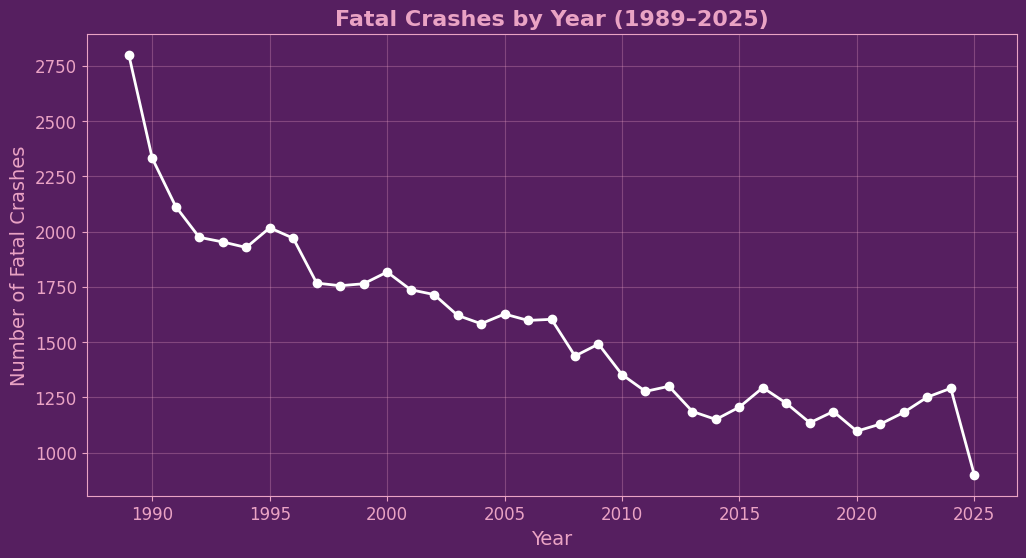

In [44]:
import matplotlib.pyplot as plt

# Set brand colors
bg_color = "#561f60"      # deep lavender purple
axis_color = "#eaa3c4"    # pinkish lavender
line_color = "white"

# Create figure
plt.figure(figsize=(12,6))
ax = plt.gca()

# Background
ax.set_facecolor(bg_color)
plt.gcf().set_facecolor(bg_color)

# Plot line
df["Year"].value_counts().sort_index().plot(
    kind="line", marker="o", color=line_color, linewidth=2, markersize=6, ax=ax
)

# Title and labels
plt.title("Fatal Crashes by Year (1989–2025)", fontsize=16, color=axis_color, weight="bold")
plt.xlabel("Year", fontsize=14, color=axis_color)
plt.ylabel("Number of Fatal Crashes", fontsize=14, color=axis_color)

# Style axes
ax.tick_params(colors=axis_color, labelsize=12)
for spine in ax.spines.values():
    spine.set_color(axis_color)

# Grid
plt.grid(True, alpha=0.3, color=axis_color)

plt.show()


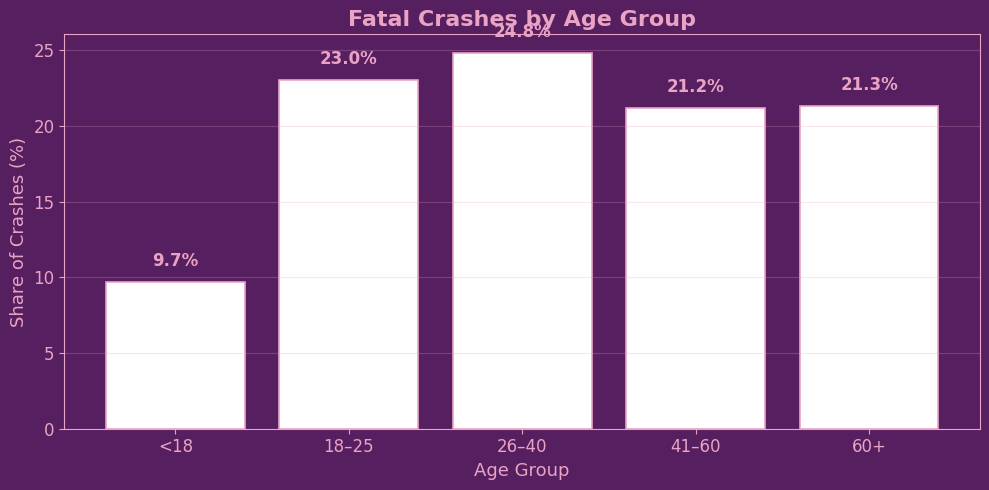

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Ensure AgeGroup exists with a consistent order ---
if "AgeGroup" not in df.columns:
    df["AgeGroup"] = pd.cut(
        df["Age"],
        bins=[0, 17, 25, 40, 60, 120],
        labels=["<18", "18–25", "26–40", "41–60", "60+"],
        right=True
    )

order = ["<18", "18–25", "26–40", "41–60", "60+"]

counts = (
    df["AgeGroup"]
    .value_counts(dropna=False)
    .reindex(order)
    .fillna(0)
    .astype(int)
)
perc = (counts / counts.sum() * 100.0).round(1)

# --- THEME COLORS ---
bg = "#561f60"       # background
axis = "#eaa3c4"     # axes/ticks/grid/text
bar = "white"        # bars

fig, ax = plt.subplots(figsize=(10,5))
ax.set_facecolor(bg)
fig.patch.set_facecolor(bg)

# Bars
bars = ax.bar(order, perc.values, color=bar, edgecolor=axis, linewidth=1.2)

# Labels & styling
ax.set_title("Fatal Crashes by Age Group", color=axis, fontsize=16, weight="bold")
ax.set_ylabel("Share of Crashes (%)", color=axis, fontsize=13)
ax.set_xlabel("Age Group", color=axis, fontsize=13)
ax.tick_params(colors=axis, labelsize=12)

for spine in ax.spines.values():
    spine.set_color(axis)

ax.grid(axis="y", color=axis, alpha=0.25)

# Add percent labels on bars
for rect, p in zip(bars, perc.values):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 0.8,
            f"{p:.1f}%", ha="center", va="bottom", color=axis, fontsize=12, weight="bold")

plt.tight_layout()
plt.show()


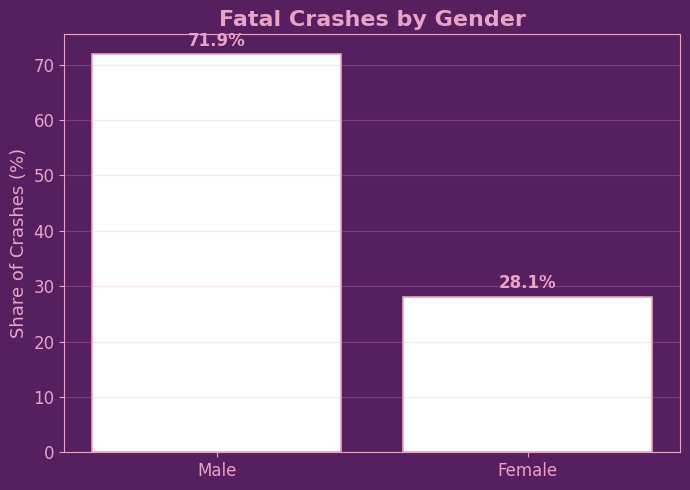

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Keep Male/Female; drop other/unknown for a clean slide
g = (df.loc[df["Gender"].isin(["Male","Female"]), "Gender"]
       .value_counts()
       .reindex(["Male","Female"])
       .fillna(0)
       .astype(int))

perc_g = (g / g.sum() * 100.0).round(1)

# THEME
bg = "#561f60"
axis = "#eaa3c4"
bar = "white"

fig, ax = plt.subplots(figsize=(7,5))
ax.set_facecolor(bg)
fig.patch.set_facecolor(bg)

bars = ax.bar(perc_g.index, perc_g.values, color=bar, edgecolor=axis, linewidth=1.2)

ax.set_title("Fatal Crashes by Gender", color=axis, fontsize=16, weight="bold")
ax.set_ylabel("Share of Crashes (%)", color=axis, fontsize=13)
ax.set_xlabel("", color=axis, fontsize=13)
ax.tick_params(colors=axis, labelsize=12)

for spine in ax.spines.values():
    spine.set_color(axis)

ax.grid(axis="y", color=axis, alpha=0.25)

# Bar labels
for rect, p in zip(bars, perc_g.values):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 0.8,
            f"{p:.1f}%", ha="center", va="bottom", color=axis, fontsize=12, weight="bold")

plt.tight_layout()
plt.show()


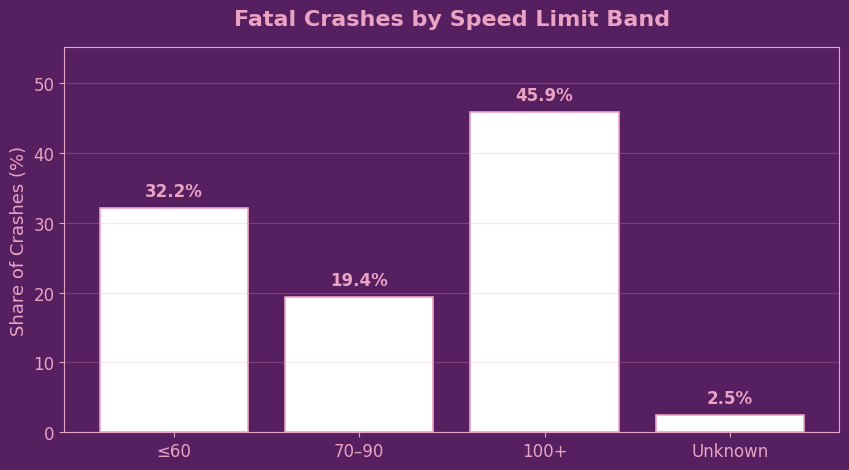

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- THEME ----------
BG   = "#561f60"   # deep lavender/purple
AXIS = "#eaa3c4"   # lavender-pink for axes/ticks/text
BAR  = "white"     # bars

# ---------- BIN SPEED LIMITS ----------
# Keep numeric; NaN => Unknown
sp = pd.to_numeric(df["Speed Limit"], errors="coerce")

bins   = [-np.inf, 60, 90, np.inf]
labels = ["≤60", "70–90", "100+"]
band   = pd.cut(sp, bins=bins, labels=labels)

# Build distribution including Unknown
band = band.astype("object")
band[sp.isna()] = "Unknown"

order = ["≤60", "70–90", "100+", "Unknown"]
counts = band.value_counts().reindex(order).fillna(0).astype(int)
perc = (counts / counts.sum() * 100).round(1)

# ---------- PLOT ----------
fig, ax = plt.subplots(figsize=(10,5))
ax.set_facecolor(BG); fig.patch.set_facecolor(BG)

bars = ax.bar(order, perc.values, color=BAR, edgecolor=AXIS, linewidth=1.2)

ax.set_title("Fatal Crashes by Speed Limit Band", color=AXIS, fontsize=16, weight="bold", pad=16)
ax.set_ylabel("Share of Crashes (%)", color=AXIS, fontsize=13)
ax.tick_params(colors=AXIS, labelsize=12)
for spine in ax.spines.values():
    spine.set_color(AXIS)
ax.grid(axis="y", color=AXIS, alpha=0.25)

# Leave headroom for labels
ymax = max(perc.values) * 1.18 + 1
ax.set_ylim(0, ymax)

# Labels on bars
for rect, p in zip(bars, perc.values):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + ymax*0.02,
            f"{p:.1f}%", ha="center", va="bottom", color=AXIS, fontsize=12, weight="bold")

plt.subplots_adjust(top=0.88)  # keep clear of title
plt.show()


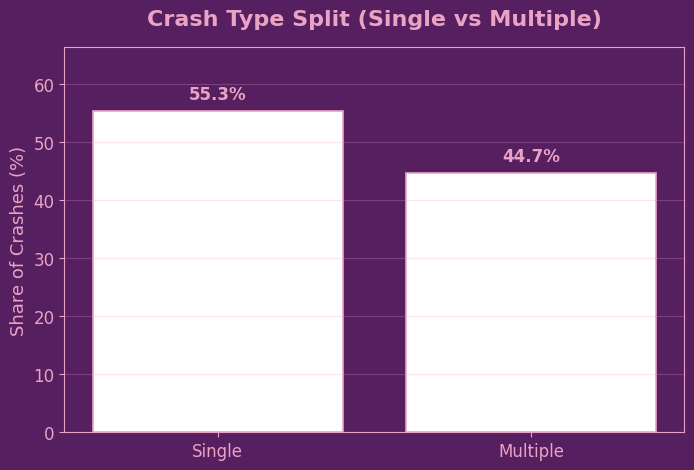

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- THEME ----------
BG   = "#561f60"
AXIS = "#eaa3c4"
BAR  = "white"

# Keep only Single/Multiple for a clean, 2-bar slide
ct = df.loc[df["Crash Type"].isin(["Single", "Multiple"]), "Crash Type"]
ct_counts = ct.value_counts().reindex(["Single","Multiple"]).fillna(0).astype(int)
ct_perc = (ct_counts / ct_counts.sum() * 100).round(1)

fig, ax = plt.subplots(figsize=(8,5))
ax.set_facecolor(BG); fig.patch.set_facecolor(BG)

bars = ax.bar(ct_perc.index, ct_perc.values, color=BAR, edgecolor=AXIS, linewidth=1.2)

ax.set_title("Crash Type Split (Single vs Multiple)", color=AXIS, fontsize=16, weight="bold", pad=16)
ax.set_ylabel("Share of Crashes (%)", color=AXIS, fontsize=13)
ax.tick_params(colors=AXIS, labelsize=12)
for spine in ax.spines.values():
    spine.set_color(AXIS)
ax.grid(axis="y", color=AXIS, alpha=0.25)

# Headroom for labels
ymax = max(ct_perc.values) * 1.18 + 1
ax.set_ylim(0, ymax)

# Labels on bars
for rect, p in zip(bars, ct_perc.values):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + ymax*0.02,
            f"{p:.1f}%", ha="center", va="bottom", color=AXIS, fontsize=12, weight="bold")

plt.subplots_adjust(top=0.88)
plt.show()


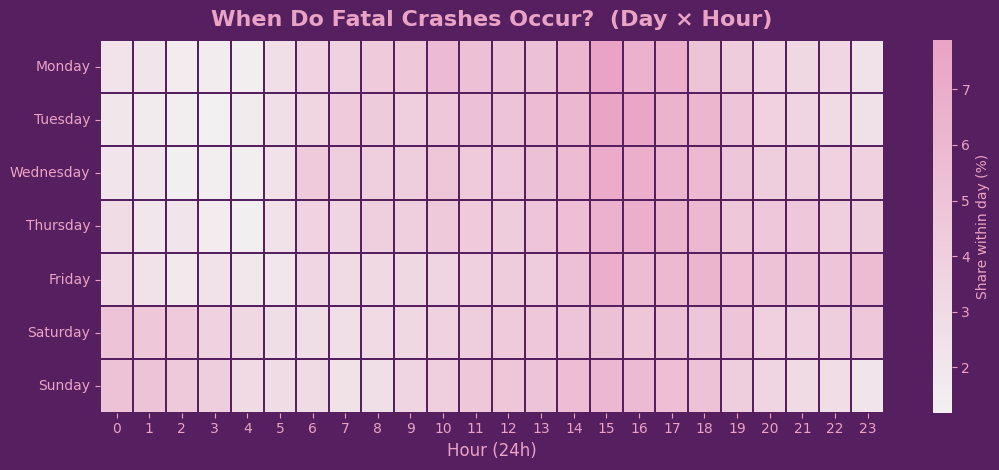

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

BG, AXIS = "#561f60", "#eaa3c4"
order_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

df_h = df.copy()
df_h["Hour"] = pd.to_numeric(df_h["Hour"], errors="coerce").astype("Int64")
df_h = df_h.dropna(subset=["Hour"])
df_h["Hour"] = df_h["Hour"].astype(int)

cross = (pd.crosstab(df_h["Dayweek"], df_h["Hour"])
           .reindex(index=order_days, columns=range(24), fill_value=0))
# Convert to row-wise percentages to normalize by day
cross_perc = cross.div(cross.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(11,4.8))
fig.patch.set_facecolor(BG); ax.set_facecolor(BG)

# Use a white→pink palette for contrast on purple bg
sns.heatmap(cross_perc, cmap=sns.light_palette("#eaa3c4", as_cmap=True),
            cbar_kws={"label": "Share within day (%)"},
            linewidths=0.3, linecolor=BG, ax=ax)

ax.set_title("When Do Fatal Crashes Occur?  (Day × Hour)", color=AXIS, fontsize=16, weight="bold", pad=10)
ax.set_xlabel("Hour (24h)", color=AXIS, fontsize=12); ax.set_ylabel("", color=AXIS)
ax.tick_params(colors=AXIS)
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_color(AXIS); cbar.ax.tick_params(colors=AXIS)

plt.tight_layout(); plt.show()


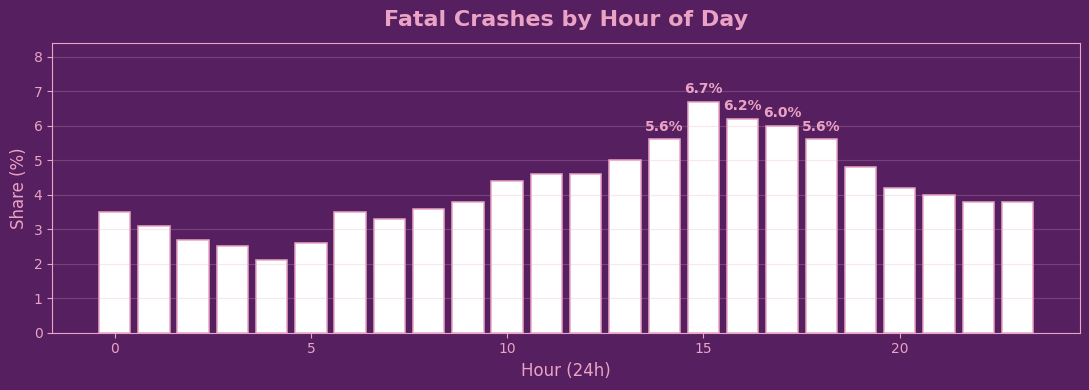

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

BG, AXIS, BAR = "#561f60", "#eaa3c4", "white"

hrs = (pd.to_numeric(df["Hour"], errors="coerce")
         .dropna().astype(int)
         .value_counts().reindex(range(24), fill_value=0))
perc = (hrs / hrs.sum() * 100).round(1)

fig, ax = plt.subplots(figsize=(11,4))
ax.set_facecolor(BG); fig.patch.set_facecolor(BG)

bars = ax.bar(perc.index, perc.values, color=BAR, edgecolor=AXIS, linewidth=1.1)
ax.set_title("Fatal Crashes by Hour of Day", color=AXIS, fontsize=16, weight="bold", pad=12)
ax.set_xlabel("Hour (24h)", color=AXIS, fontsize=12); ax.set_ylabel("Share (%)", color=AXIS, fontsize=12)
ax.tick_params(colors=AXIS); [sp.set_color(AXIS) for sp in ax.spines.values()]
ax.grid(axis="y", color=AXIS, alpha=0.25)

ymax = perc.max()*1.18 + 0.5
ax.set_ylim(0, ymax)
for r, p in zip(bars, perc.values):
    if p >= perc.max()*0.75:  # label only biggest bars to avoid clutter
        ax.text(r.get_x()+r.get_width()/2, r.get_height()+ymax*0.02, f"{p:.1f}%", ha="center", va="bottom", color=AXIS, fontsize=10, weight="bold")
plt.tight_layout(); plt.show()


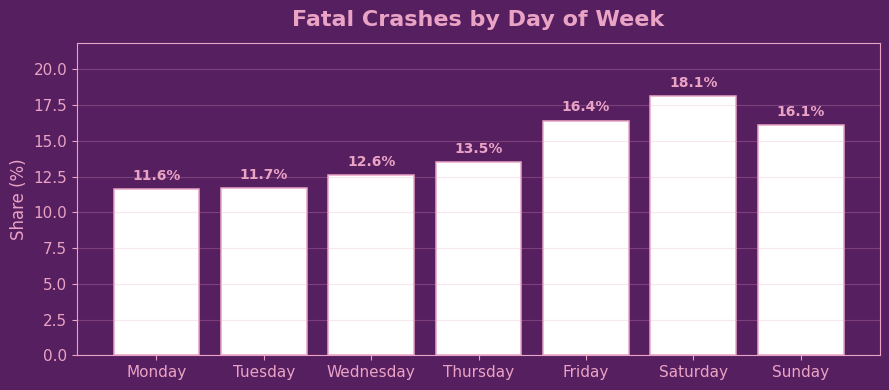

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

BG, AXIS, BAR = "#561f60", "#eaa3c4", "white"
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

days = (df["Dayweek"].value_counts()
          .reindex(order, fill_value=0))
perc = (days / days.sum() * 100).round(1)

fig, ax = plt.subplots(figsize=(9,4))
ax.set_facecolor(BG); fig.patch.set_facecolor(BG)

bars = ax.bar(order, perc.values, color=BAR, edgecolor=AXIS, linewidth=1.1)
ax.set_title("Fatal Crashes by Day of Week", color=AXIS, fontsize=16, weight="bold", pad=12)
ax.set_ylabel("Share (%)", color=AXIS, fontsize=12); ax.set_xlabel("", color=AXIS)
ax.tick_params(colors=AXIS, labelsize=11, rotation=0); [sp.set_color(AXIS) for sp in ax.spines.values()]
ax.grid(axis="y", color=AXIS, alpha=0.25)

ymax = perc.max()*1.18 + 0.5
ax.set_ylim(0, ymax)
for r, p in zip(bars, perc.values):
    ax.text(r.get_x()+r.get_width()/2, r.get_height()+ymax*0.02, f"{p:.1f}%", ha="center", va="bottom", color=AXIS, fontsize=10, weight="bold")
plt.tight_layout(); plt.show()


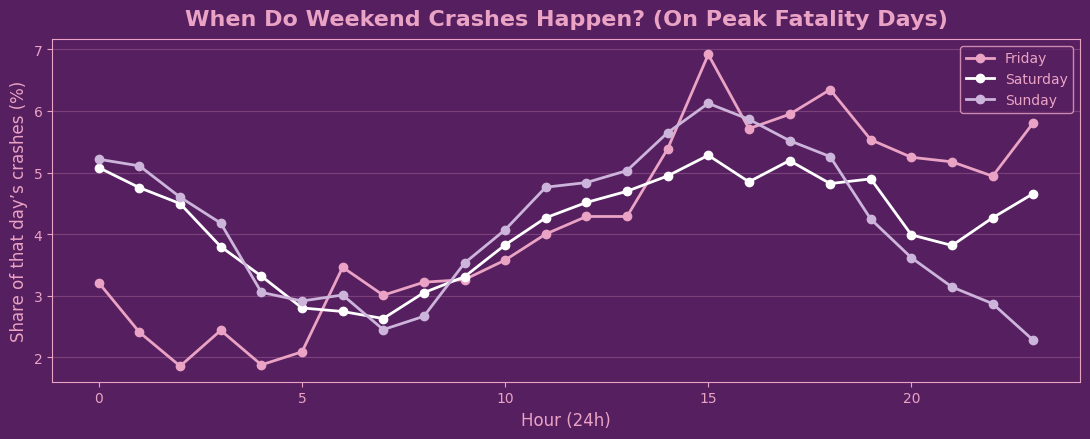

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

BG, AXIS = "#561f60", "#eaa3c4"
c_fri, c_sat, c_sun = "#eaa3c4", "white", "#cdb4db"  # brand-friendly on dark bg

# Prep: keep Fri–Sun, clean hour
df_fs = df[df["Dayweek"].isin(["Friday","Saturday","Sunday"])].copy()
df_fs["Hour"] = pd.to_numeric(df_fs["Hour"], errors="coerce").astype("Int64")
df_fs = df_fs.dropna(subset=["Hour"])
df_fs["Hour"] = df_fs["Hour"].astype(int)

# Cross-tab: day x hour -> % within each day (so shapes are comparable)
ct = pd.crosstab(df_fs["Dayweek"], df_fs["Hour"]).reindex(
    index=["Friday","Saturday","Sunday"], columns=range(24), fill_value=0
)
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100  # row-normalised (% within day)

# Plot
fig, ax = plt.subplots(figsize=(11,4.5))
ax.set_facecolor(BG); fig.patch.set_facecolor(BG)

ax.plot(ct_pct.columns, ct_pct.loc["Friday"],   color=c_fri, marker="o", linewidth=2, label="Friday")
ax.plot(ct_pct.columns, ct_pct.loc["Saturday"], color=c_sat, marker="o", linewidth=2, label="Saturday")
ax.plot(ct_pct.columns, ct_pct.loc["Sunday"],   color=c_sun, marker="o", linewidth=2, label="Sunday")

ax.set_title("When Do Weekend Crashes Happen? (On Peak Fatality Days)", color=AXIS, fontsize=16, weight="bold", pad=10)
ax.set_xlabel("Hour (24h)", color=AXIS, fontsize=12)
ax.set_ylabel("Share of that day’s crashes (%)", color=AXIS, fontsize=12)
ax.tick_params(colors=AXIS)
for s in ax.spines.values():
    s.set_color(AXIS)
ax.grid(axis="y", color=AXIS, alpha=0.25)
ax.legend(facecolor=BG, edgecolor=AXIS, labelcolor=AXIS)

plt.tight_layout()
plt.show()


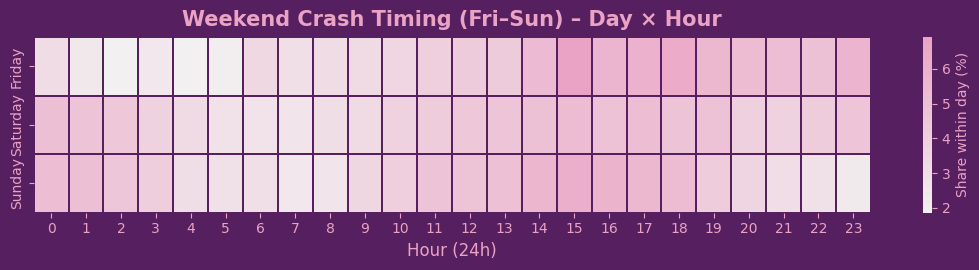

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

BG, AXIS = "#561f60", "#eaa3c4"

# Reuse ct_pct from above if already computed; else compute again:
df_fs = df[df["Dayweek"].isin(["Friday","Saturday","Sunday"])].copy()
df_fs["Hour"] = pd.to_numeric(df_fs["Hour"], errors="coerce").astype("Int64")
df_fs = df_fs.dropna(subset=["Hour"])
df_fs["Hour"] = df_fs["Hour"].astype(int)
ct = pd.crosstab(df_fs["Dayweek"], df_fs["Hour"]).reindex(
    index=["Friday","Saturday","Sunday"], columns=range(24), fill_value=0
)
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(11,2.8))
fig.patch.set_facecolor(BG); ax.set_facecolor(BG)

sns.heatmap(ct_pct, cmap=sns.light_palette("#eaa3c4", as_cmap=True),
            linewidths=0.3, linecolor=BG,
            cbar_kws={"label":"Share within day (%)"}, ax=ax)

ax.set_title("Weekend Crash Timing (Fri–Sun) – Day × Hour", color=AXIS, fontsize=15, weight="bold", pad=8)
ax.set_xlabel("Hour (24h)", color=AXIS, fontsize=12); ax.set_ylabel("", color=AXIS)
ax.tick_params(colors=AXIS)
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_color(AXIS); cbar.ax.tick_params(colors=AXIS)

plt.tight_layout(); plt.show()


C:\Users\Nooru\AppData\Local\Temp\ipykernel_18100\2349972635.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hour_dt = pd.to_datetime(df["Time"].astype(str), errors="coerce").dt.hour


,Test,p_value,neglog10_p,significant
2,Chi²: Gender × Crash Type,3.807945e-61,60.419309,True
3,ANOVA: Age ~ Crash Type,3.245428e-76,75.488728,True
0,Chi²: Crash Type × Day,3.722104e-88,87.429212,True
1,Chi²: Crash Type × SpeedBand,2.822777e-109,108.549323,True
4,ANOVA: Hour ~ Day,5.554988e-177,176.255317,True


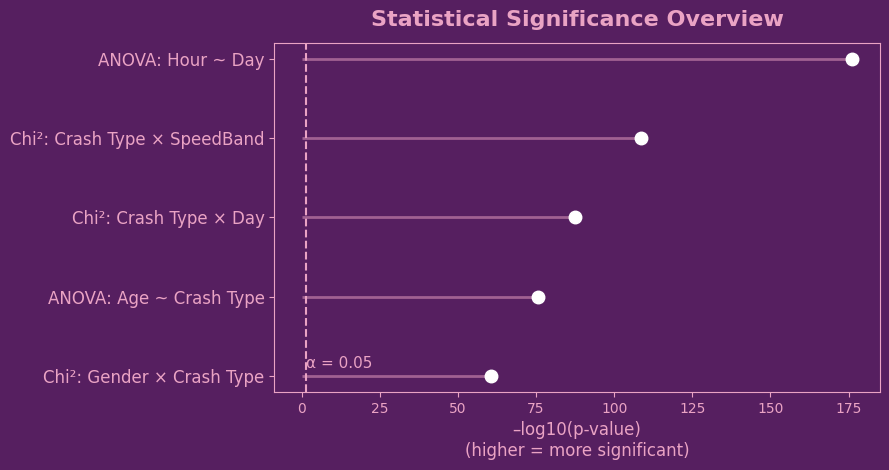

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway

# ---------------------------
# THEME
# ---------------------------
BG   = "#561f60"   # deep lavender/purple
AXIS = "#eaa3c4"   # lavender-pink for axes/ticks/text
DOT  = "white"     # dots/lines

# ---------------------------
# 1) Ensure HOUR exists (robust to either "HH:MM:SS" strings or numeric HHMM)
# ---------------------------
if "Hour" not in df.columns:
    # Try datetime parse first (handles 'HH:MM:SS')
    hour_dt = pd.to_datetime(df["Time"].astype(str), errors="coerce").dt.hour
    # Fallback: numeric HHMM (e.g., 1730 -> 17)
    time_num = pd.to_numeric(df["Time"], errors="coerce")
    hour_num = (time_num // 100).astype("Int64")
    df["Hour"] = hour_dt.fillna(hour_num).astype("Int64")

# ---------------------------
# 2) Build SpeedBand and clean Crash Type
# ---------------------------
sp = pd.to_numeric(df["Speed Limit"], errors="coerce")
bands = pd.cut(sp, bins=[-np.inf, 60, 90, np.inf], labels=["≤60","70–90","100+"]).astype(object)
bands[sp.isna()] = "Unknown"
df["SpeedBand"] = bands

df["Crash Type"] = df["Crash Type"].replace({"Unknown": np.nan})
df_stat = df.dropna(subset=["Crash Type"]).copy()

# Guarantee categorical order for Dayweek (optional)
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
if "Dayweek" in df_stat.columns:
    df_stat["Dayweek"] = pd.Categorical(df_stat["Dayweek"], categories=day_order, ordered=True)

# ---------------------------
# 3) Run tests and collect p-values
# ---------------------------
tests = []

# Chi²: Crash Type × Day of Week
if df_stat["Dayweek"].notna().any():
    tab = pd.crosstab(df_stat["Dayweek"], df_stat["Crash Type"])
    if tab.shape[0] > 1 and tab.shape[1] > 1:
        chi2, p, dof, _ = chi2_contingency(tab)
        tests.append(("Chi²: Crash Type × Day", p))

# Chi²: Crash Type × SpeedBand
tab = pd.crosstab(df_stat["SpeedBand"], df_stat["Crash Type"])
if tab.shape[0] > 1 and tab.shape[1] > 1:
    chi2, p, dof, _ = chi2_contingency(tab)
    tests.append(("Chi²: Crash Type × SpeedBand", p))

# Chi²: Gender × Crash Type
if "Gender" in df_stat.columns:
    tab = pd.crosstab(df_stat["Gender"], df_stat["Crash Type"])
    # Filter to Male/Female to avoid -9/Unknown noise (optional but cleaner)
    if "Male" in tab.index or "Female" in tab.index:
        chi2, p, dof, _ = chi2_contingency(tab)
        tests.append(("Chi²: Gender × Crash Type", p))

# ANOVA: Age ~ Crash Type (Single vs Multiple)
a_single   = df_stat.loc[df_stat["Crash Type"]=="Single",   "Age"].dropna()
a_multiple = df_stat.loc[df_stat["Crash Type"]=="Multiple", "Age"].dropna()
if len(a_single) > 2 and len(a_multiple) > 2:
    F, p = f_oneway(a_single, a_multiple)
    tests.append(("ANOVA: Age ~ Crash Type", p))

# ANOVA: Hour ~ Day (do peak hours differ by weekday?)
if df_stat["Hour"].notna().any() and df_stat["Dayweek"].notna().any():
    groups = []
    labels = []
    for d in day_order:
        vals = df_stat.loc[df_stat["Dayweek"]==d, "Hour"].dropna().values
        if len(vals) > 1:
            groups.append(vals)
            labels.append(d)
    if len(groups) >= 2:
        F, p = f_oneway(*groups)
        tests.append(("ANOVA: Hour ~ Day", p))

# Assemble results
res = pd.DataFrame(tests, columns=["Test","p_value"])
res["neglog10_p"] = -np.log10(res["p_value"])
res = res.sort_values("neglog10_p", ascending=True)

# Print a small table too (useful in notebook)
display(res.assign(significant=res["p_value"] < 0.05))

# ---------------------------
# 4) Plot –log10(p) (higher = more significant)
# ---------------------------
fig, ax = plt.subplots(figsize=(9,4.8))
ax.set_facecolor(BG); fig.patch.set_facecolor(BG)

y = np.arange(len(res))
# Lollipop: stem + dot
ax.hlines(y, 0, res["neglog10_p"], color=AXIS, alpha=0.5, linewidth=2)
ax.plot(res["neglog10_p"], y, "o", color=DOT, markersize=9)

# α = 0.05 threshold
thr = -np.log10(0.05)
ax.axvline(thr, color=AXIS, linestyle="--", linewidth=1.5)
ax.text(thr+0.05, 0.1, "α = 0.05", color=AXIS, fontsize=11)

ax.set_yticks(y)
ax.set_yticklabels(res["Test"], color=AXIS, fontsize=12)
ax.set_xlabel("–log10(p-value)\n(higher = more significant)", color=AXIS, fontsize=12)
ax.set_title("Statistical Significance Overview", color=AXIS, fontsize=16, weight="bold", pad=12)
ax.tick_params(colors=AXIS)
for s in ax.spines.values():
    s.set_color(AXIS)

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import numpy as np

# Build results list again (including test stat & dof when relevant)
results = []

# Chi²: Crash Type × Day of Week
tab = pd.crosstab(df_stat["Dayweek"], df_stat["Crash Type"])
if tab.shape[0] > 1 and tab.shape[1] > 1:
    chi2, p, dof, _ = chi2_contingency(tab)
    results.append(["Chi²", "Crash Type × Day", chi2, dof, p])

# Chi²: Crash Type × SpeedBand
tab = pd.crosstab(df_stat["SpeedBand"], df_stat["Crash Type"])
if tab.shape[0] > 1 and tab.shape[1] > 1:
    chi2, p, dof, _ = chi2_contingency(tab)
    results.append(["Chi²", "Crash Type × SpeedBand", chi2, dof, p])

# Chi²: Gender × Crash Type
tab = pd.crosstab(df_stat["Gender"], df_stat["Crash Type"])
if tab.shape[0] > 1 and tab.shape[1] > 1:
    chi2, p, dof, _ = chi2_contingency(tab)
    results.append(["Chi²", "Gender × Crash Type", chi2, dof, p])

# ANOVA: Age ~ Crash Type
a_single   = df_stat.loc[df_stat["Crash Type"]=="Single", "Age"].dropna()
a_multiple = df_stat.loc[df_stat["Crash Type"]=="Multiple", "Age"].dropna()
if len(a_single)>2 and len(a_multiple)>2:
    F, p = f_oneway(a_single, a_multiple)
    results.append(["ANOVA", "Age ~ Crash Type", F, 1, p])

# ANOVA: Hour ~ Day
groups = [df_stat.loc[df_stat["Dayweek"]==d, "Hour"].dropna().values for d in day_order if d in df_stat["Dayweek"].unique()]
if sum(len(g)>1 for g in groups) >= 2:
    F, p = f_oneway(*groups)
    results.append(["ANOVA", "Hour ~ Day", F, len(groups)-1, p])

# Put in dataframe
matrix = pd.DataFrame(results, columns=["Test","Variables","Statistic","df","p_value"])
matrix["Significant?"] = np.where(matrix["p_value"] < 0.05, "✅", "❌")

# Format nicely
def highlight_sig(val):
    color = 'background-color: #ffcccc' if val < 0.05 else ''
    return color

styled_matrix = (matrix.style
                 .applymap(highlight_sig, subset=["p_value"])
                 .format({"Statistic": "{:.2f}", "p_value": "{:.4f}"}))

styled_matrix


C:\Users\Nooru\AppData\Local\Temp\ipykernel_18100\3800660615.py:47: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_matrix = (matrix.style


,Test,Variables,Statistic,df,p_value,Significant?
0,Chi²,Crash Type × Day,422.67,6,0.0000,✅
1,Chi²,Crash Type × SpeedBand,505.67,3,0.0000,✅
2,Chi²,Gender × Crash Type,278.24,2,0.0000,✅
3,ANOVA,Age ~ Crash Type,342.36,1,0.0000,✅
4,ANOVA,Hour ~ Day,140.08,6,0.0000,✅


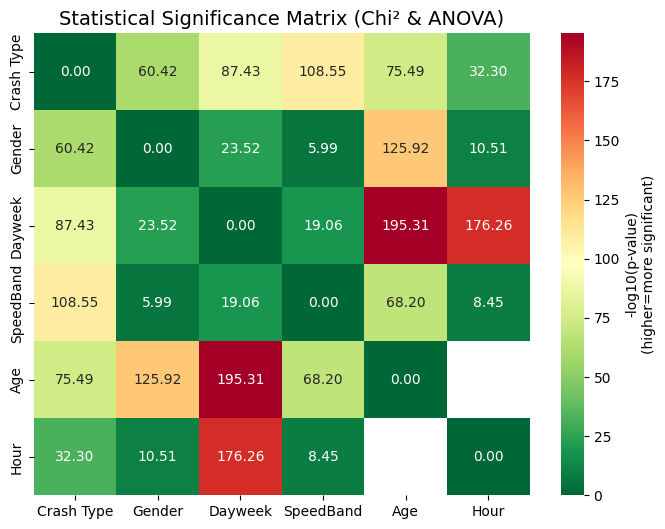

In [9]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway

# Variables of interest
categorical_vars = ["Crash Type", "Gender", "Dayweek", "SpeedBand"]
continuous_vars  = ["Age", "Hour"]

all_vars = categorical_vars + continuous_vars

# Matrix to hold -log10(p)
matrix = pd.DataFrame(index=all_vars, columns=all_vars, dtype=float)

# Loop over pairs
for v1, v2 in itertools.combinations(all_vars, 2):
    try:
        if v1 in categorical_vars and v2 in categorical_vars:
            # Chi²
            tab = pd.crosstab(df_stat[v1], df_stat[v2])
            if tab.shape[0] > 1 and tab.shape[1] > 1:
                chi2, p, dof, _ = chi2_contingency(tab)
                score = -np.log10(p)
            else:
                score = np.nan
        elif v1 in continuous_vars and v2 in categorical_vars:
            # ANOVA continuous ~ categorical
            groups = [df_stat.loc[df_stat[v2]==cat, v1].dropna() for cat in df_stat[v2].unique()]
            if sum(len(g)>1 for g in groups) >= 2:
                F, p = f_oneway(*groups)
                score = -np.log10(p)
            else:
                score = np.nan
        elif v2 in continuous_vars and v1 in categorical_vars:
            groups = [df_stat.loc[df_stat[v1]==cat, v2].dropna() for cat in df_stat[v1].unique()]
            if sum(len(g)>1 for g in groups) >= 2:
                F, p = f_oneway(*groups)
                score = -np.log10(p)
            else:
                score = np.nan
        else:
            score = np.nan
    except Exception:
        score = np.nan
    
    matrix.loc[v1, v2] = score
    matrix.loc[v2, v1] = score

# Fill diagonal
np.fill_diagonal(matrix.values, 0)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(matrix.astype(float), cmap="RdYlGn_r", annot=True, fmt=".2f",
            cbar_kws={"label":"-log10(p-value)\n(higher=more significant)"})
plt.title("Statistical Significance Matrix (Chi² & ANOVA)", fontsize=14)
plt.show()


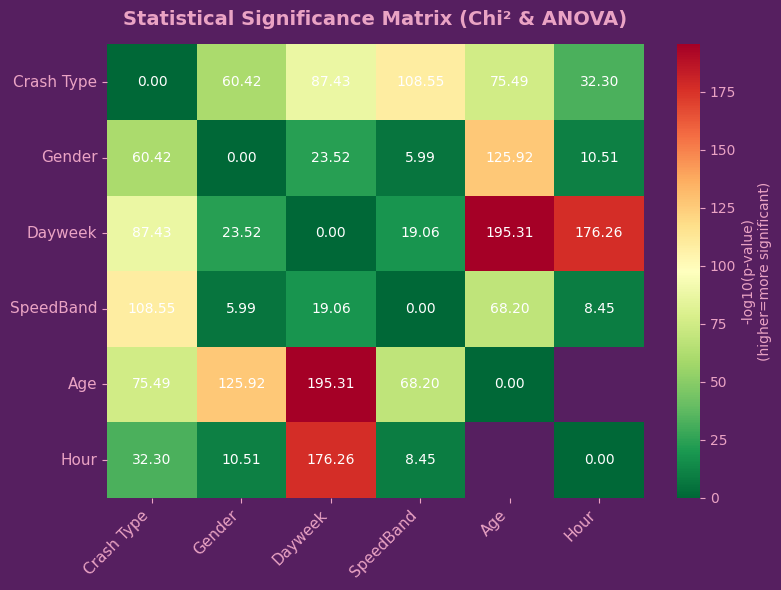

In [10]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway

# Variables of interest
categorical_vars = ["Crash Type", "Gender", "Dayweek", "SpeedBand"]
continuous_vars  = ["Age", "Hour"]
all_vars = categorical_vars + continuous_vars

# Matrix to hold -log10(p)
matrix = pd.DataFrame(index=all_vars, columns=all_vars, dtype=float)

# Loop over pairs
for v1, v2 in itertools.combinations(all_vars, 2):
    try:
        if v1 in categorical_vars and v2 in categorical_vars:
            tab = pd.crosstab(df_stat[v1], df_stat[v2])
            if tab.shape[0] > 1 and tab.shape[1] > 1:
                chi2, p, dof, _ = chi2_contingency(tab)
                score = -np.log10(p)
            else:
                score = np.nan
        elif v1 in continuous_vars and v2 in categorical_vars:
            groups = [df_stat.loc[df_stat[v2]==cat, v1].dropna() for cat in df_stat[v2].unique()]
            if sum(len(g)>1 for g in groups) >= 2:
                F, p = f_oneway(*groups)
                score = -np.log10(p)
            else:
                score = np.nan
        elif v2 in continuous_vars and v1 in categorical_vars:
            groups = [df_stat.loc[df_stat[v1]==cat, v2].dropna() for cat in df_stat[v1].unique()]
            if sum(len(g)>1 for g in groups) >= 2:
                F, p = f_oneway(*groups)
                score = -np.log10(p)
            else:
                score = np.nan
        else:
            score = np.nan
    except Exception:
        score = np.nan
    
    matrix.loc[v1, v2] = score
    matrix.loc[v2, v1] = score

np.fill_diagonal(matrix.values, 0)

# ---------------------------
# PLOT
# ---------------------------
BG   = "#561f60"   # background
AXIS = "#eaa3c4"   # text/axes
DOT  = "white"

plt.figure(figsize=(8,6))
ax = sns.heatmap(matrix.astype(float), cmap="RdYlGn_r",
                 annot=True, fmt=".2f", annot_kws={"color":"white"},
                 cbar_kws={"label":"-log10(p-value)\n(higher=more significant)"} )

# Apply theme
ax.set_facecolor(BG)
plt.gcf().patch.set_facecolor(BG)
ax.set_title("Statistical Significance Matrix (Chi² & ANOVA)",
             color=AXIS, fontsize=14, weight="bold", pad=14)
ax.tick_params(colors=AXIS, labelsize=11)
ax.xaxis.label.set_color(AXIS)
ax.yaxis.label.set_color(AXIS)
ax.figure.axes[-1].yaxis.label.set_color(AXIS)   # colorbar label
ax.figure.axes[-1].tick_params(colors=AXIS)      # colorbar ticks

# Axis labels
ax.set_xticklabels(ax.get_xticklabels(), color=AXIS, rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), color=AXIS, rotation=0)

plt.tight_layout()
plt.show()


c:\Users\Nooru\comp3420\lib\site-packages\xgboost\training.py:183: UserWarning: [15:18:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


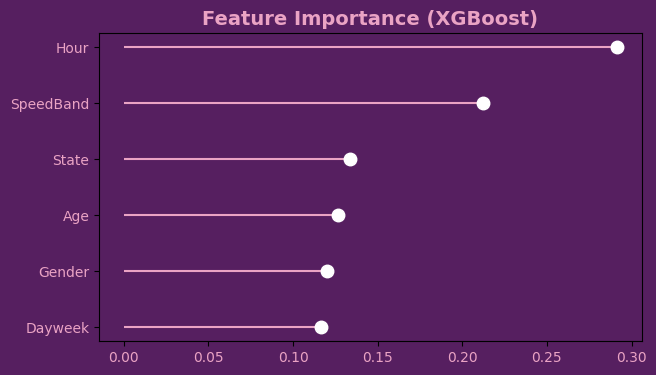

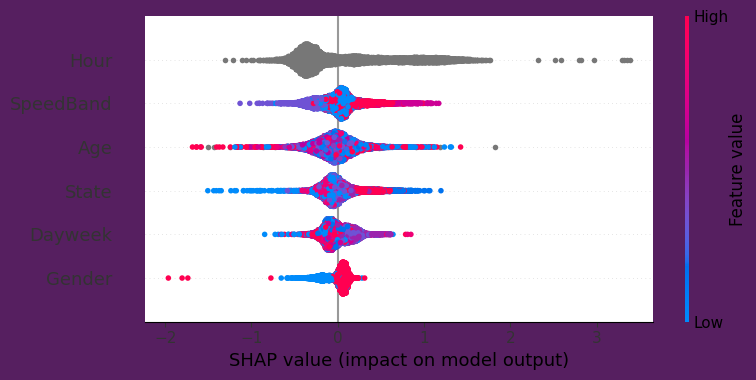

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt

# ----------------------
# 1) Prepare data
# ----------------------
df_ml = df_stat.copy()

# Target: Single vs Multiple crash
y = (df_ml["Crash Type"] == "Single").astype(int)

# Features
X = df_ml[["Gender","Dayweek","SpeedBand","Age","Hour","State"]].copy()

# Encode categoricals (force int, avoids 'category' errors)
for col in X.select_dtypes(include=["object","category"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# ----------------------
# 2) Train XGBoost
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
model.fit(X_train, y_train)

# ----------------------
# 3) Feature Importance Lollipop
# ----------------------
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values()

plt.figure(figsize=(7,4))
plt.hlines(feat_imp.index, 0, feat_imp.values, color="#eaa3c4")
plt.plot(feat_imp.values, feat_imp.index, "o", color="white", markersize=9)
plt.title("Feature Importance (XGBoost)", color="#eaa3c4", fontsize=14, weight="bold")
plt.gca().set_facecolor("#561f60")
plt.gcf().patch.set_facecolor("#561f60")
plt.xticks(color="#eaa3c4")
plt.yticks(color="#eaa3c4")
plt.show()

# ----------------------
# 4) SHAP Beeswarm
# ----------------------
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(8,5))
shap.summary_plot(shap_values, X_test, plot_type="dot", show=False, color_bar=True)
plt.gcf().set_facecolor("#561f60")
plt.show()


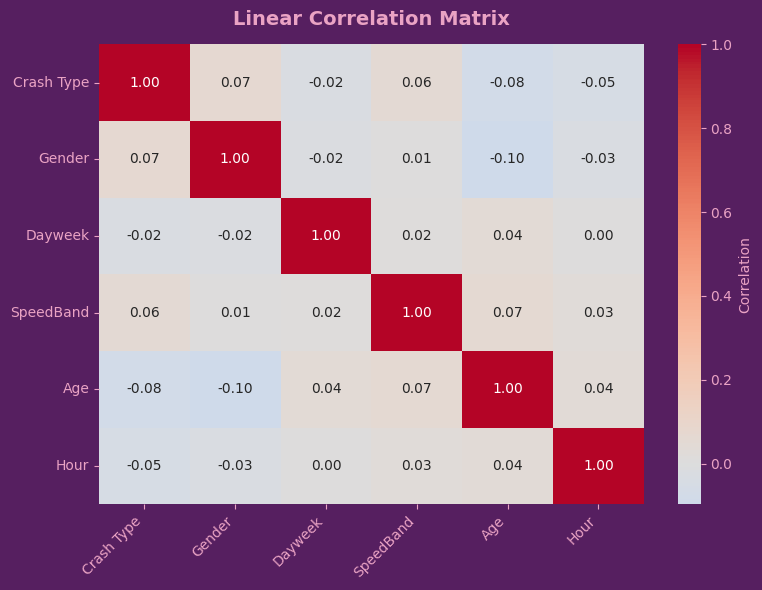

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copy features + encode categoricals numerically for corr
corr_df = df_stat[["Crash Type","Gender","Dayweek","SpeedBand","Age","Hour"]].copy()

# Encode object/category columns as ints
for col in corr_df.select_dtypes(include=["object","category"]).columns:
    corr_df[col] = corr_df[col].astype(str).astype("category").cat.codes

# Compute correlation matrix
corr = corr_df.corr()

# Plot heatmap in purple theme
plt.figure(figsize=(8,6))
ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0,
                 cbar_kws={"label": "Correlation"})

# Apply theme
BG   = "#561f60"
AXIS = "#eaa3c4"

ax.set_facecolor(BG)
plt.gcf().patch.set_facecolor(BG)
plt.title("Linear Correlation Matrix", color=AXIS, fontsize=14, weight="bold", pad=14)
ax.tick_params(colors=AXIS)
ax.figure.axes[-1].yaxis.label.set_color(AXIS)
ax.figure.axes[-1].tick_params(colors=AXIS)
plt.xticks(color=AXIS, rotation=45, ha="right")
plt.yticks(color=AXIS, rotation=0)

plt.tight_layout()
plt.show()


In [16]:
# Ensure Hour is a plain int, no nulls
X["Hour"] = pd.to_numeric(X["Hour"], errors="coerce").fillna(-1).astype(int)


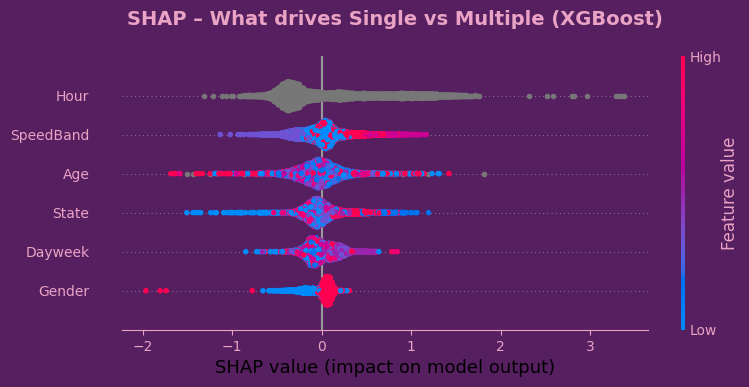

In [17]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# ---- Theme
BG   = "#561f60"   # background
AXIS = "#eaa3c4"   # labels/ticks/title

# 1) Recompute SHAP with the modern API so color encodes feature values properly
explainer = shap.TreeExplainer(model)             # model from your XGBoost fit
sv = explainer(X_test)                            # <-- returns shap.Explanation

# 2) Beeswarm (max 10 features shown). show=False so we can theme after.
plt.figure(figsize=(10,4.6))
shap.plots.beeswarm(sv, max_display=10, show=False)

# 3) Apply your theme
fig = plt.gcf()
fig.patch.set_facecolor(BG)
for ax in fig.axes:
    ax.set_facecolor(BG)
    ax.tick_params(colors=AXIS, labelsize=10)
    for spine in ax.spines.values():
        spine.set_color(AXIS)
# Title + colorbar styling
plt.suptitle("SHAP – What drives Single vs Multiple (XGBoost)", color=AXIS, fontsize=14, fontweight="bold", y=0.98)
# SHAP puts a colorbar on the last axis; recolor its ticks/label
cbar = None
for ax in fig.axes:
    if hasattr(ax, 'colorbar') and ax.colorbar:   # older SHAP
        cbar = ax.colorbar
if cbar is None and len(fig.axes) > 1 and hasattr(fig.axes[-1], 'get_ybound'):
    # Usually the last axis is colorbar in new SHAP
    cax = fig.axes[-1]
    cax.tick_params(colors=AXIS)
    if cax.yaxis.label is not None:
        cax.yaxis.label.set_color(AXIS)

plt.tight_layout()
plt.show()


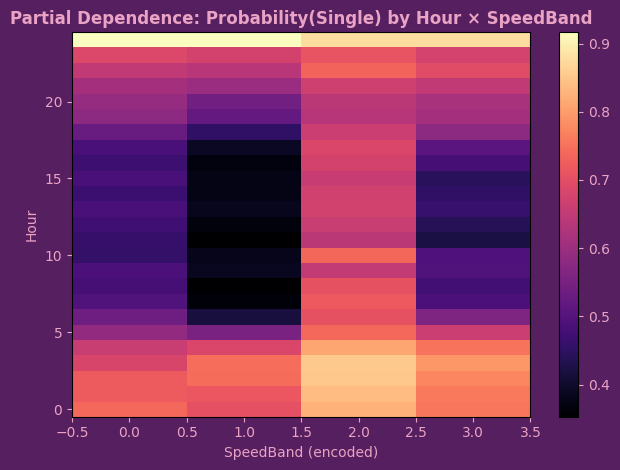

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence

feat_pairs = [(X.columns.get_loc("Hour"), X.columns.get_loc("SpeedBand"))]
pdp = partial_dependence(model, X, features=feat_pairs, kind="average")
Z = pdp.average[0]  # shape (len(hour_grid), len(speed_grid))

plt.figure(figsize=(6.5,4.8))
ax = plt.gca()
im = ax.imshow(Z, origin="lower", aspect="auto", cmap="magma")
ax.set_title("Partial Dependence: Probability(Single) by Hour × SpeedBand", color=AXIS, fontweight="bold")
ax.set_xlabel("SpeedBand (encoded)", color=AXIS)
ax.set_ylabel("Hour", color=AXIS)
ax.set_facecolor(BG); plt.gcf().patch.set_facecolor(BG)
ax.tick_params(colors=AXIS); 
cbar = plt.colorbar(im); cbar.ax.yaxis.label.set_color(AXIS); cbar.ax.tick_params(colors=AXIS)
plt.tight_layout(); plt.show()
